# Transforming word vectors

Para traduzir uma palavra em ingl√™s para o franc√™s, uma maneira seria gerar uma lista extensa de palavras em ingl√™s e suas correspondentes em franc√™s. Se voc√™ pedir a um humano para fazer isso, encontraria algu√©m que conhece ambos os idiomas para come√ßar a fazer a lista. Se voc√™ quiser que uma m√°quina aprenda a fazer isso, voc√™ calcularia embeddings de palavras associadas ao ingl√™s e embeddings de palavras associadas ao franc√™s. Em seguida, recuperaria o embedding da palavra em ingl√™s, como "cat", e encontraria uma maneira de transformar esse embedding em um embedding que tenha o significado no espa√ßo vetorial das palavras em franc√™s.

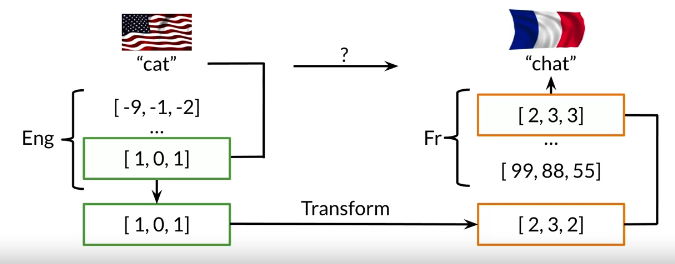

Para fazer isso, voc√™ converter√° o espa√ßo vetorial de palavras em ingl√™s para o espa√ßo vetorial de palavras em franc√™s. Em seguida, voc√™ pegar√° o vetor de palavras transformado e procurar√° os vetores de palavras no espa√ßo vetorial franc√™s que s√£o mais semelhantes a ele. As palavras mais semelhantes s√£o candidatas para sua tradu√ß√£o. Se sua m√°quina fizer um bom trabalho, ela poder√° encontrar a palavra "chat", que √© a palavra francesa para "cat". Voc√™ quer encontrar a matriz que pode fazer essa transforma√ß√£o para voc√™.

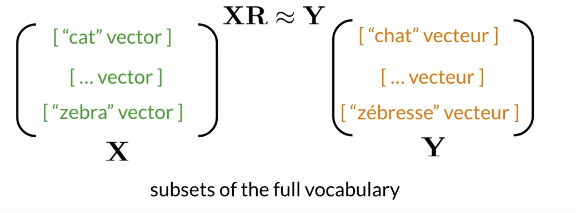

Agora que sabemos que pode haver uma matriz que transforma nossos vetores de palavras em ingl√™s em vetores de palavras relevantes em franc√™s, como definimos essa matriz de transforma√ß√£o, que denotaremos como R? Podemos come√ßar com uma matriz R selecionada aleatoriamente e ver como ela se comporta. Quando voc√™ tenta traduzir os vetores em ingl√™s na matriz X e os compara com os vetores reais de palavras em franc√™s na matriz Y. 
Para que isso funcione, voc√™ precisar√° primeiro obter um subconjunto de palavras em ingl√™s e seus equivalentes em franc√™s. Obtenha seus respectivos vetores de palavras e empilhe os vetores de palavras nas respectivas matrizes, X e Y. A chave aqui √© manter as linhas alinhadas, ou alinhar os vetores de palavras. Isso significa que, se a primeira linha da matriz X contiver a palavra "cat", ent√£o a primeira linha da matriz Y deve conter a palavra francesa para "cat", que √© "chat".

Agora voc√™ pode estar se perguntando: "Espere um minuto. Se eu j√° tenho as palavras em ingl√™s e suas tradu√ß√µes em franc√™s, por que preciso treinar um modelo para fazer isso? Por que n√£o apenas salvar essas informa√ß√µes em um mapeamento de chave-valor, como um dicion√°rio Python?" Bem, a vantagem √© que voc√™ pode coletar apenas um subconjunto dessas palavras para encontrar sua matriz de transforma√ß√£o. E, se ela funcionar bem, o modelo pode ser usado para traduzir palavras que n√£o fazem parte do seu conjunto de treinamento original. Portanto, voc√™ s√≥ precisa treinar em um subconjunto do vocabul√°rio ingl√™s-franc√™s, e n√£o no vocabul√°rio inteiro.

Ent√£o, vamos ver como encontrar a matriz R ideal. Primeiro, comparamos a tradu√ß√£o $ X \cdot R $ com os embeddings reais das palavras em franc√™s na matriz $ Y $. Fazemos isso multiplicando a matriz $ X $ pela matriz $ R $ e subtraindo a matriz $ Y $. Vou explicar em mais detalhes o que essa express√£o significa e tamb√©m o que significa esse subscrito F mai√∫sculo. Por enquanto, pense nisso como uma medida de qu√£o distante a tradu√ß√£o tentativa est√° dos vetores reais em franc√™s.

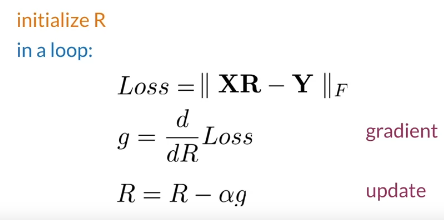

Se voc√™ come√ßar com uma matriz $ R $ aleat√≥ria, pode melhorar gradualmente essa matriz $ R $ em um loop. Primeiro, calcule o gradiente tomando a derivada dessa fun√ß√£o de perda em rela√ß√£o √† matriz $ R $. Em seguida, atualize a matriz $ R $ subtraindo o gradiente, mas note que √© o gradiente ponderado pela taxa de aprendizado alfa. Voc√™ pode escolher um n√∫mero fixo de vezes para percorrer o loop ou verificar a perda em cada itera√ß√£o e sair do loop quando a perda cair abaixo de um certo limite.

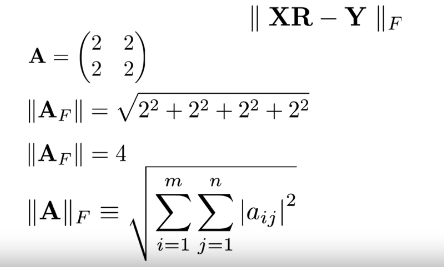

Agora, vamos explicar o que essa nota√ß√£o significa, o que as duas barras verticais duplas significam. Isso mede a magnitude ou a norma de uma matriz. Vamos ver um exemplo de c√°lculo dessa norma e, em seguida, ver a f√≥rmula geral. Digamos que o resultado de $ X \cdot R - Y $ seja uma matriz. Vamos supor, para este exemplo, que h√° apenas duas palavras neste dicion√°rio, que √© o n√∫mero de linhas na matriz. E os embeddings das palavras t√™m duas dimens√µes. Ent√£o, as matrizes $ X $, $ R $, $ Y $ e $ A $ s√£o todas matrizes 2x2. Se a matriz $ A $ se parecer com isso, ent√£o para calcular sua norma, tomamos $2^2 + 2^2 + 2^2 + 2^2$ e depois tomamos a raiz quadrada. Isso nos d√° quatro. Essa norma tem o subscrito F porque √© chamada de norma de Frobenius.

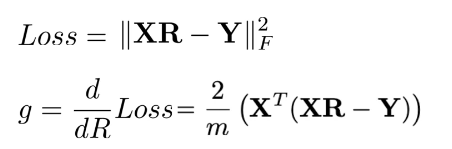

Agora, vamos detalhar como calcular o gradiente da fun√ß√£o de perda. A perda √© definida como o quadrado da norma de Frobenius, o gradiente √© a derivada da perda em rela√ß√£o √† matriz $ R $. O escalar $ M $ √© o n√∫mero de linhas ou palavras no subconjunto que estamos usando para treinamento. Se voc√™ se lembra do c√°lculo, isso pode parecer familiar para voc√™ se fingir que $ R $ √© uma vari√°vel √∫nica em vez de uma matriz. E $ X $ e $ Y $ s√£o constantes.

O motivo pelo qual usamos o quadrado da norma de Frobenius. √â mais f√°cil tomar a derivada dessa express√£o, em vez de lidar com as ra√≠zes quadradas que est√£o na norma de Frobenius.

# Rotation matrices in R2

## Transformando Vetores

Existem tr√™s transforma√ß√µes principais de vetores:
* Escala
* Transla√ß√£o
* Rota√ß√£o

A opera√ß√£o de rota√ß√£o muda a dire√ß√£o de um vetor, deixando sua dimensionalidade e sua norma inalteradas.

In [38]:
import numpy as np                     # Importa numpy para manipula√ß√£o de arrays
import matplotlib.pyplot as plt        # Importa matplotlib para gr√°ficos

In [39]:
# Procedimento para plotar setas que representam vetores com pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        if vec.shape[0] == 1:     # vetor linha
            x_dir.append(vec[0][0])
            y_dir.append(vec[0][1])
        elif vec.shape[1] == 1:   # vetor coluna
            x_dir.append(vec[0][0])
            y_dir.append(vec[1][0])
    
    if ax is None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes is None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        if vec.shape[0] == 1:     # vetor linha
            ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
        elif vec.shape[1] == 1:   # vetor coluna
            ax2.arrow(0, 0, vec[0][0], vec[1][0], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax is None:
        plt.show()
        fig.savefig(fname)

# Exemplo 1

In [40]:
# Cria uma matriz 2 x 2
R = np.array([[-2, 0],
              [0, 2]])
R

# Cria um vetor linha como um array NumPy com uma √∫nica linha
x = np.array([[1, 1]])

O produto escalar entre uma matriz quadrada e a transposta de um vetor linha produz uma rota√ß√£o e escalonamento do vetor original.

Lembre-se de que a maneira recomendada para obter o produto escalar em Python √© `np.dot(a, b)`:

In [41]:
y = np.dot(R, x.T) # Aplica o produto escalar entre R e x.T
y                  # Vetor coluna como um array NumPy com uma √∫nica coluna

array([[-2],
       [ 2]])

Vamos usar o Pyplot para inspecionar visualmente o efeito da rota√ß√£o em vetores 2D.

Agora podemos plotar o vetor $\vec{x} = [1, 1]$ em um plano cartesiano. O plano cartesiano ser√° centrado em `[0,0]` e seus limites x e y estar√£o entre `[-4, +4]`.

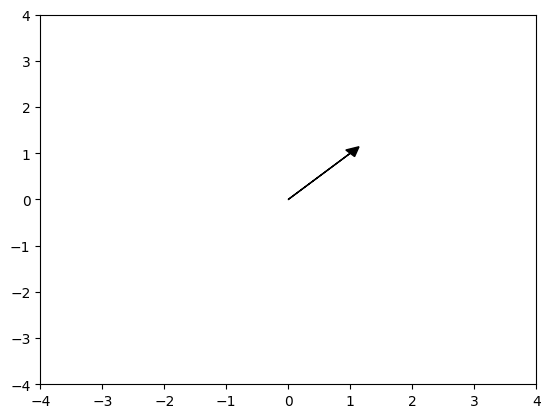

In [42]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

Agora, vamos plotar no mesmo sistema nosso vetor $\vec{x} = [1, 1]$ e o produto escalar da matriz com $x.T$.

$$
R = \begin{bmatrix} -2 & 0 \\ 0 & 2 \end{bmatrix}
$$

$$
y = R \cdot x.T
$$

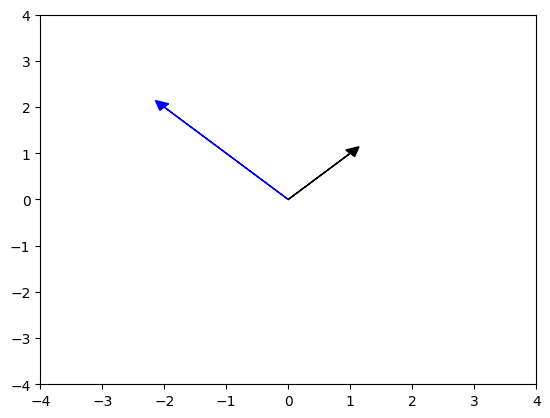

In [43]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

Note que o vetor `x` (preto) √© transformado no vetor `y` (azul).

### Exemplo 2

Dados compostos por 2 atributos reais pertencem a um espa√ßo $ \mathbb{R} \times \mathbb{R} $ ou $ \mathbb{R}^2 $. Matrizes de rota√ß√£o em $ \mathbb{R}^2 $ rotacionam um vetor $\vec{x}$ por um √¢ngulo $\theta$ no sentido anti-hor√°rio em um sistema de coordenadas fixo. Matrizes de rota√ß√£o s√£o da forma:

$$
Ro = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}
$$

**(Nota:** Este notebook usa $ y = Ro \cdot x.T $, mas se voc√™ usar $ y = x \cdot Ro $, as matrizes de rota√ß√£o em $ \mathbb{R}^2 $ rotacionam um vetor $\vec{x}$ por um √¢ngulo $\theta$ no sentido hor√°rio em um sistema de coordenadas fixo**).

As fun√ß√µes trigonom√©tricas no Numpy exigem o √¢ngulo em radianos, n√£o em graus. Na pr√≥xima c√©lula, definimos uma matriz de rota√ß√£o que rotaciona vetores no sentido anti-hor√°rio por $100^\circ$.

In [44]:
angle = 100 * (np.pi / 180) # Converte graus para radianos

Ro = np.array([[np.cos(angle), -np.sin(angle)],
               [np.sin(angle), np.cos(angle)]])

x2 = np.array([[2, 2]])    # Vetor linha como um array NumPy
y2 = np.dot(Ro, x2.T)

print('Matriz de rota√ß√£o')
print(Ro)
print('\nVetor rotacionado')
print(y2)

print('\n Norma de x2', np.linalg.norm(x2))
print('\n Norma de y2', np.linalg.norm(y2))
print('\n Norma da matriz de rota√ß√£o', np.linalg.norm(Ro))

Matriz de rota√ß√£o
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Vetor rotacionado
[[-2.31691186]
 [ 1.62231915]]

 Norma de x2 2.8284271247461903

 Norma de y2 2.82842712474619

 Norma da matriz de rota√ß√£o 1.414213562373095


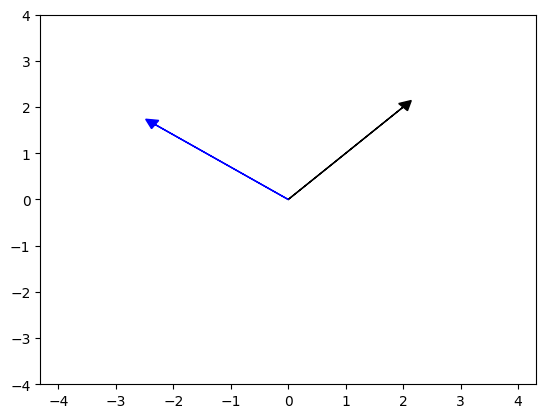

In [45]:
plot_vectors([x2, y2], fname='transform_02.svg')

Alguns pontos a serem observados:

* A norma do vetor de entrada √© a mesma que a norma do vetor de sa√≠da. Matrizes de rota√ß√£o n√£o modificam a norma do vetor, apenas sua dire√ß√£o.
* A norma de qualquer matriz de rota√ß√£o em $R^2$ √© sempre $\sqrt{2} = 1.414221$.

## Norma de Frobenius

A norma de Frobenius √© a generaliza√ß√£o para $R^2$ da j√° conhecida fun√ß√£o de norma para vetores:

$$
\| \vec{a} \| = \sqrt{\vec{a} \cdot \vec{a}}
$$

Para uma dada matriz $A$ em $R^2$, a norma de Frobenius √© definida como:

$$
\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{ij}\right|^{2}}
$$

`np.square()` √© uma maneira de elevar ao quadrado cada elemento de uma matriz. Seu resultado √© equivalente ao uso do operador * com arrays do NumPy.


In [46]:
A = np.array([[2, 2],
              [2, 2]])

In [47]:
A_squared = np.square(A)
A_squared

A_squared = A * A
A_squared

array([[4, 4],
       [4, 4]])

Agora voc√™ pode somar os elementos do array resultante e, em seguida, obter a raiz quadrada da soma.

In [48]:
A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

Essa foi a vers√£o estendida da fun√ß√£o `np.linalg.norm()`. Voc√™ pode verificar que ela produz o mesmo resultado.

In [49]:
print('Norma de Frobenius da matriz de rota√ß√£o')
print(np.sqrt(np.sum(Ro * Ro)), '==', np.linalg.norm(Ro))

Norma de Frobenius da matriz de rota√ß√£o
1.414213562373095 == 1.414213562373095


# K-nearest neighbors

Uma opera√ß√£o fundamental necess√°ria para encontrar uma palavra correspondente √© encontrar os k vizinhos mais pr√≥ximos de um vetor. Perceba que uma transforma√ß√£o ou o vetor ap√≥s a transforma√ß√£o, se for um embedding atrav√©s de uma matriz R, estaria no espa√ßo vetorial de palavras em franc√™s. No entanto, n√£o ser√° necessariamente id√™ntico a nenhum dos vetores de palavras no espa√ßo vetorial de palavras em franc√™s. Voc√™ precisa procurar nos vetores de palavras francesas reais para encontrar uma palavra francesa que seja semelhante √†quela que voc√™ criou a partir da transforma√ß√£o. Voc√™ pode encontrar palavras como "salut" ou "bonjour", que podem ser retornadas como a tradu√ß√£o francesa da palavra "hello".

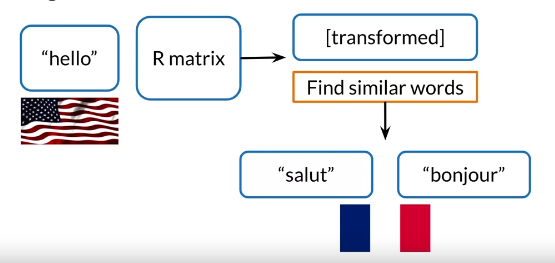

Ent√£o, a quest√£o √©, como voc√™ encontra vetores de palavras semelhantes? Para entender como encontrar vetores de palavras semelhantes, vamos olhar para uma pergunta relacionada. Como voc√™ encontra seus amigos que moram perto? Vamos imaginar que voc√™ est√° visitando San Francisco, nos Estados Unidos, e est√° visitando seu querido amigo Andrew. Voc√™ tamb√©m quer visitar seus outros amigos no fim de semana, de prefer√™ncia aqueles que moram perto. Uma maneira de fazer isso √© vasculhar sua agenda de endere√ßos e, para cada amigo, obter o endere√ßo deles e calcular a dist√¢ncia de San Francisco. Um amigo est√° em Xangai, outro est√° em Bangalore e outro est√° em Los Angeles. Voc√™ pode classificar seus amigos pelas dist√¢ncias at√© San Francisco e, em seguida, classific√°-los por proximidade. Observe que, se voc√™ tiver muitos amigos, esse √© um processo muito demorado. Existe uma maneira mais eficiente de fazer isso?

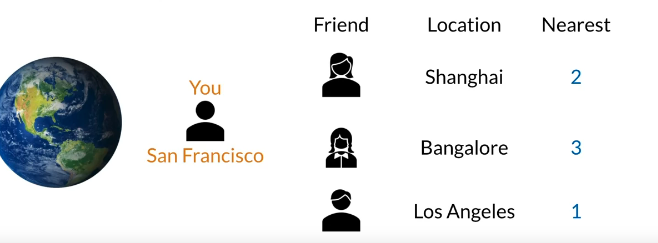

Perceba que dois desses amigos vivem em outro continente, enquanto o terceiro amigo vive nos Estados Unidos. Voc√™ poderia ter procurado apenas um subconjunto de amigos que moram nos Estados Unidos. Voc√™ pode ter percebido que pode n√£o ser necess√°rio vasculhar todos os seus amigos no seu endere√ßo para encontrar os mais pr√≥ximos de voc√™. Voc√™ pode imaginar que, se pudesse filtrar de alguma forma quais amigos estavam todos em uma regi√£o geral, como a Am√©rica do Norte, poderia procurar apenas dentro desse subgrupo de amigos. Se houver uma maneira de dividir o espa√ßo geogr√°fico em regi√µes, voc√™ poderia procurar apenas dentro dessas regi√µes.

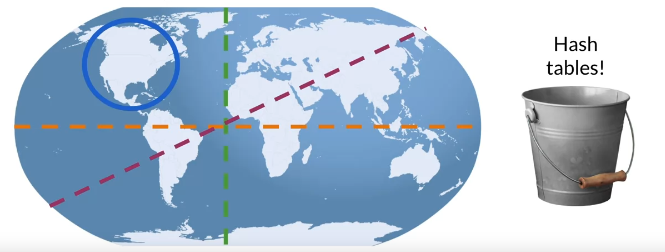

Quando voc√™ pensa em organizar subconjuntos de um conjunto de dados de maneira eficiente, pode pensar em colocar seus dados em baldes. Se voc√™ pensar em baldes, definitivamente pensar√° em tabelas hash. Tabelas hash s√£o ferramentas √∫teis para qualquer tipo de trabalho envolvendo dados.

# Hash tables and hash functions

Imagine que voc√™ tem um arm√°rio com v√°rias gavetas e deseja colocar objetos semelhantes em gavetas semelhantes: documentos de papel sozinhos, chaves sozinhas e livros sozinhos. Agora, digamos que voc√™ tenha v√°rios itens de dados e deseja agrup√°-los em compartimentos por algum tipo de similaridade. Um compartimento pode conter mais de um item, e cada item √© sempre atribu√≠do ao mesmo compartimento. O resultado seria, por exemplo, que estes ovais azuis terminam no compartimento n√∫mero 1, estes ret√¢ngulos cinza terminam no compartimento n√∫mero 2 e estes tri√¢ngulos magenta s√£o atribu√≠dos ao compartimento 3.

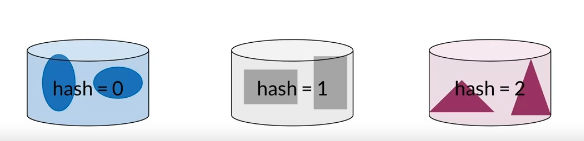

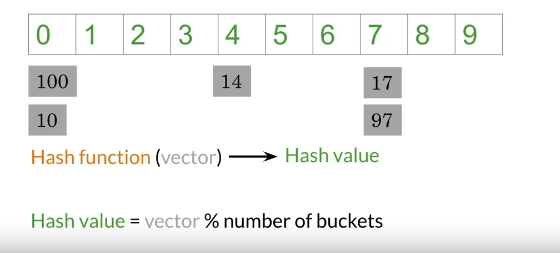

Vamos pensar em como fazer isso com vetores de palavras. Primeiro, vamos supor que os vetores de palavras tenham apenas uma dimens√£o em vez de 300 dimens√µes, ent√£o cada palavra √© representada por um √∫nico n√∫mero, como 100, 14, 17, 10 e 97. Precisamos encontrar uma maneira de dar a cada vetor um valor de hash, que √© uma chave que nos diz em qual compartimento ele ser√° atribu√≠do. Uma fun√ß√£o que atribui um valor de hash √© chamada de fun√ß√£o de hash. Neste exemplo, aqui est√° uma tabela de hash, que √© um conjunto de compartimentos. Neste caso, a tabela de hash tem 10 compartimentos. Note como os vetores de palavras 100 e 10 s√£o atribu√≠dos ao compartimento 0. O vetor de palavras 14 √© atribu√≠do ao compartimento 4, e os vetores de palavras 17 e 97 s√£o atribu√≠dos ao compartimento 7. Voc√™ percebe um padr√£o? Esta f√≥rmula aqui √© a fun√ß√£o de hash que est√° sendo usada para atribuir os vetores de palavras aos seus respectivos compartimentos. O operador m√≥dulo pega o resto ap√≥s a divis√£o por 10. O resto √© o valor de hash que nos diz onde o vetor de palavras deve ser armazenado. Por exemplo, 14 dividido por 10 tem um resto de 4, ent√£o vai para o compartimento 4.

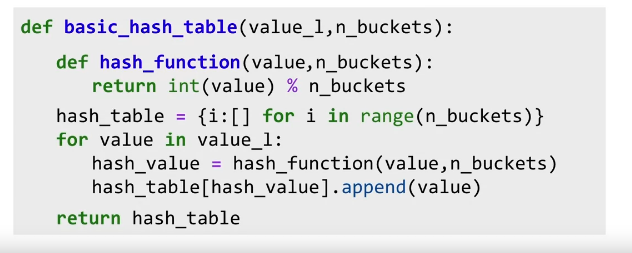

Agora, vamos construir um c√≥digo b√°sico de hash table. Aqui est√° uma defini√ß√£o de uma fun√ß√£o que recebe uma lista de valores. Voc√™ pode pensar em cada valor como um vetor unidimensional. Tamb√©m recebe o n√∫mero de compartimentos. Defina a fun√ß√£o de hash usada no operador m√≥dulo. Ent√£o voc√™ cria a tabela de hash. Note que esta √© uma compreens√£o de dicion√°rio. A chave √© um inteiro e o valor √© uma lista vazia que voc√™ usar√° como compartimento para armazenamento. Para cada vetor de palavras, calcule seu valor de hash e, em seguida, adicione-o √† lista apropriada.

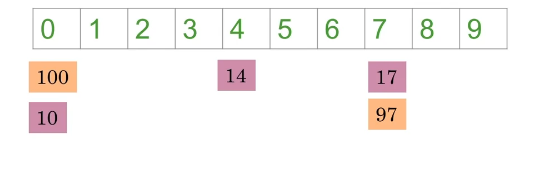

Agora vamos dar outra olhada nesta tabela de hash b√°sica. Lembre-se de que seu objetivo original era colocar vetores de palavras semelhantes no mesmo compartimento. Mas aqui, n√£o parece que n√∫meros que est√£o pr√≥ximos uns dos outros estejam no mesmo compartimento. Por exemplo, 10, 14 e 17 est√£o em compartimentos diferentes. Idealmente, voc√™ deseja ter uma fun√ß√£o de hash que coloque vetores de palavras semelhantes nos mesmos compartimentos, como isto. Para fazer isso, voc√™ precisar√° usar o que √© chamado de hashing sens√≠vel √† localidade. Localidade √© outra palavra para localiza√ß√£o. Sens√≠vel √© outra palavra para "cuidar". Portanto, hashing sens√≠vel √† localidade √© um m√©todo de hashing que se importa muito em atribuir itens com base em onde eles est√£o localizados no espa√ßo do vetor.

# Locality sensitive hashing

Um m√©todo importante que voc√™ usar√° para reduzir o custo computacional de encontrar vizinhos em espa√ßos de alta dimens√£o √© o hashing sens√≠vel √† localidade (LSH). Para come√ßar a pensar em hashing sens√≠vel √† localidade, vamos primeiro assumir que voc√™ est√° usando vetores de palavras com apenas duas dimens√µes. Cada vetor √© representado como um c√≠rculo ao inv√©s de setas. 

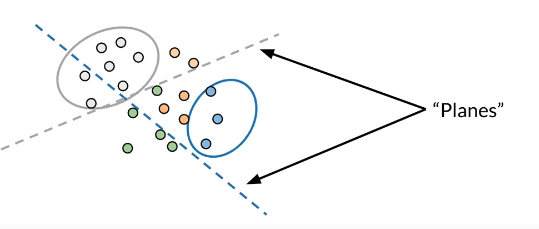

Ent√£o, digamos que voc√™ queira encontrar uma maneira de saber que esses pontos azuis est√£o de alguma forma pr√≥ximos uns dos outros e que esses pontos cinzas tamb√©m est√£o relacionados entre si.

Primeiro, divida o espa√ßo usando essas linhas tracejadas, que eu chamarei de planos. Vou explicar por que os chamo de planos em um momento. Observe como o plano azul divide o espa√ßo em vetores que est√£o acima ou abaixo dele. Os vetores azuis est√£o todos do mesmo lado do plano azul. Da mesma forma, os vetores cinza est√£o acima do plano cinza. Parece que os planos podem nos ajudar a agrupar os vetores em subconjuntos com base em sua localiza√ß√£o, isso √© exatamente o que voc√™ quer: uma fun√ß√£o de hash que seja sens√≠vel √† localiza√ß√£o dos itens que est√° atribuindo aos compartimentos.

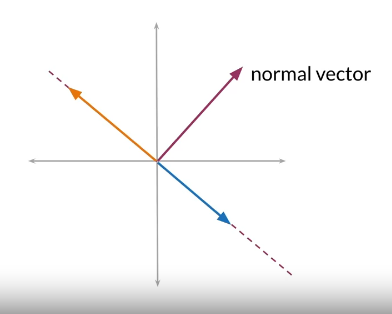

Voc√™ est√° a caminho de entender o hashing sens√≠vel √† localidade. Agora, vamos ver por que estou chamando essas linhas tracejadas de planos. Um plano seria esta linha magenta no espa√ßo bidimensional e, na verdade, representa todos os poss√≠veis vetores que estariam sentados naquele plano. Em outras palavras, eles seriam paralelos ao plano, como este vetor azul ou este vetor laranja. Voc√™ pode definir um plano com um √∫nico vetor; este vetor magenta √© perpendicular ao plano e √© chamado de vetor normal ao plano. O vetor normal √© perpendicular a qualquer vetor que esteja no plano. 

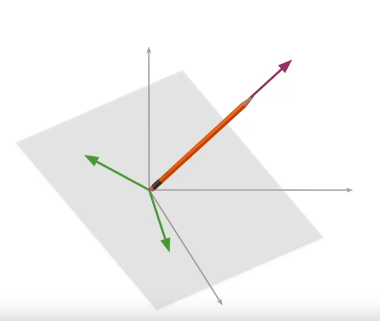

Pode ajudar a pensar nisso em tr√™s dimens√µes: encontre uma folha de papel e um l√°pis. Coloque o papel na mesa e desenhe alguns vetores nele, depois segure o l√°pis verticalmente sobre o papel. Quaisquer vetores no papel s√£o perpendiculares ao l√°pis.

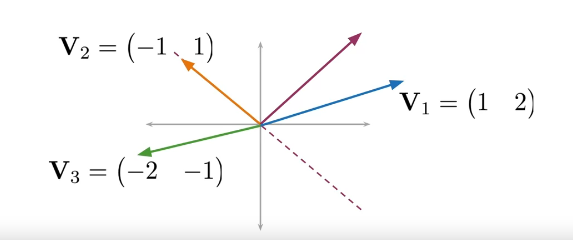

Voltemos √†s duas dimens√µes. Voc√™ consegue ver visualmente quando o vetor est√° de um lado do plano ou do outro. Mas como voc√™ faz isso matematicamente? Aqui est√£o tr√™s vetores de exemplo em azul, laranja e verde, o vetor normal ao plano √© rotulado como P. 

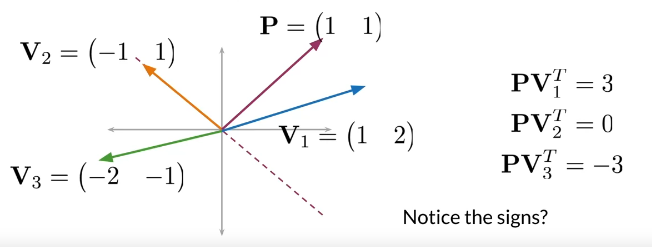

Vamos nos concentrar no vetor um. E se voc√™ calcular o produto escalar de P com o vetor um? Voc√™ obt√©m tr√™s. Vou explicar em breve por que voc√™ est√° fazendo isso. Agora, vamos olhar para o vetor dois. Se voc√™ calcular o produto escalar de P com o vetor dois, voc√™ obt√©m zero. Finalmente, vamos olhar para o vetor tr√™s. Se voc√™ calcular o produto escalar de P com o vetor tr√™s, voc√™ obt√©m menos tr√™s.

Ao calcular o produto escalar de um vetor normal P com outro vetor, voc√™ est√° essencialmente medindo a proje√ß√£o do vetor sobre a dire√ß√£o do vetor normal. Um resultado positivo indica que o vetor est√° de um lado do plano, um resultado zero indica que o vetor est√° no plano e um resultado negativo indica que o vetor est√° do outro lado do plano. Assim, voc√™ pode usar o produto escalar para determinar a localiza√ß√£o relativa dos vetores em rela√ß√£o ao plano e, dessa forma, agrupar vetores semelhantes no mesmo compartimento usando hashing sens√≠vel √† localidade.

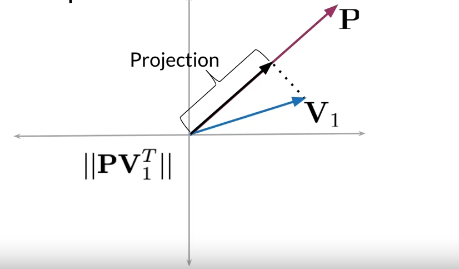

Para visualizar o produto escalar, imagine um dos vetores, como P, como se fosse a superf√≠cie da Terra. A gravidade puxa todos os objetos diretamente para baixo em dire√ß√£o √† superf√≠cie da Terra. Agora, imagine que voc√™ est√° no final do vetor V1. Voc√™ amarra uma corda a uma pedra e deixa a gravidade puxar a pedra para a superf√≠cie do vetor P, a corda √© perpendicular ao vetor P. Agora, se voc√™ desenhar um vetor que est√° na mesma dire√ß√£o de P, o que termina na pedra √© o que chamamos de proje√ß√£o do vetor V1 no vetor P. A magnitude ou comprimento desse vetor √© igual ao produto escalar de V1 e P.

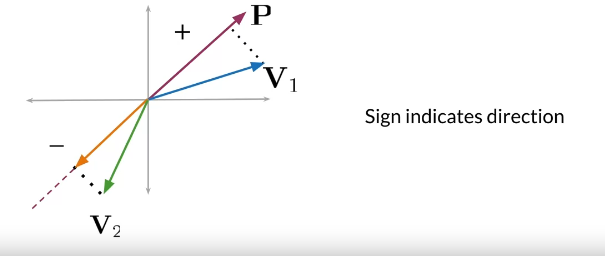

Al√©m disso, se voc√™ tivesse este outro vetor verde e o projetasse no vetor P, o vetor projetado estaria apontando na dire√ß√£o paralela, mas oposta a P. O produto escalar seria um n√∫mero negativo. Isso significa que o sinal do produto escalar indica a dire√ß√£o da proje√ß√£o em rela√ß√£o ao vetor normal roxo. Ent√£o, se o produto escalar √© positivo ou negativo, pode dizer se o vetor V1 ou V2 est√° de um lado do plano ou do outro.

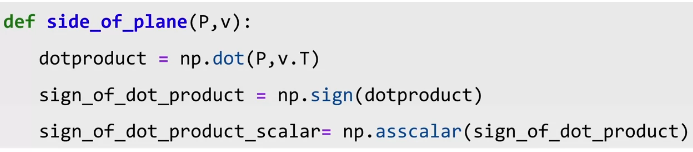

Vamos usar o c√≥digo para verificar de que lado do plano um vetor est√°. A fun√ß√£o `side_of_plane` recebe o vetor normal P e um vetor V. Use `np.dot` para calcular o produto escalar, use `np.sign` para obter um `+1` se o produto escalar for positivo, `-1` se o produto for negativo ou `0` se o produto escalar for zero. Estou usando `np.asscalar` para pegar o valor escalar. Note a pron√∫ncia dessa fun√ß√£o: se um vetor pode ser representado como um √∫nico escalar, esta fun√ß√£o recupera esse escalar e √© isso.

# Multiple Planes

Para dividir seu espa√ßo vetorial em regi√µes gerenci√°veis, voc√™ vai querer usar mais de um plano. Para cada plano, voc√™ pode descobrir se um vetor est√° do lado positivo ou negativo daquele plano. Voc√™ obter√° v√°rios sinais, um para cada plano, e voc√™ vai querer encontrar uma maneira de combinar todos esses sinais em um √∫nico valor de hash. Esse valor de hash definir√° uma regi√£o particular dentro do espa√ßo vetorial.

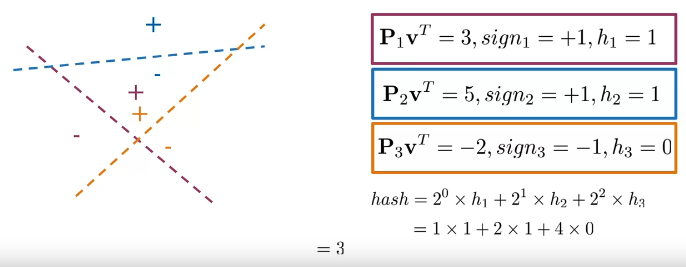

Vamos passar por um exemplo e ent√£o voc√™ ver√° a f√≥rmula geral para combinar sinais de m√∫ltiplos planos. Para um vetor √∫nico, digamos que seu produto escalar com o Plano 1 √© tr√™s, ent√£o o sinal √© positivo e o valor de hash √© definido como um para indicar que o sinal √© positivo. Para o segundo plano, o produto escalar √© cinco. O sinal √© novamente positivo e o valor de hash √© um. Para o terceiro plano, o produto escalar √© negativo dois. O sinal √© negativo e o valor de hash √© definido como zero para indicar que o vetor est√° do lado negativo do Plano 3.

Para combinar esses valores de hash intermedi√°rios em um √∫nico valor de hash, voc√™ far√° o seguinte: pegue 2^0 vezes h_1 mais 2^1 vezes h_2 mais 2^2 vezes h_3. Isso nos d√° um valor de hash combinado de tr√™s. S√≥ para relembrar, voc√™ tem v√°rios planos e isso nos ajuda a dividir o espa√ßo vetorial em sub-regi√µes menores. Mas voc√™ quer ter um √∫nico valor de hash para saber em qual bucket atribuir o vetor. Voc√™ faz isso combinando os sinais de todos os planos em um √∫nico valor de hash.

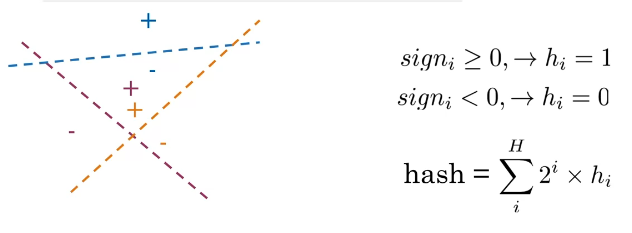

Aqui est√£o as regras que voc√™ aplicou escritas: Se o sinal do produto escalar for maior ou igual a zero, atribua o valor de hash intermedi√°rio de um. Caso contr√°rio, se o produto escalar for menor que zero, atribua o valor de hash intermedi√°rio de zero. Para combinar os valores de hash intermedi√°rios, use esta f√≥rmula. Isso √© o que voc√™ obt√©m com a hash sens√≠vel √† localidade.

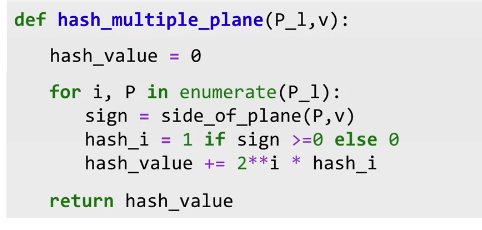

Vamos implementar isso em c√≥digo. Dada uma lista de planos e um vetor, comece com um valor de hash de zero, que voc√™ usar√° para acumular a soma dos valores de hash intermedi√°rios. Em seguida, para cada plano, voc√™ quer calcular o sinal do produto escalar. Defina o valor de hash intermedi√°rio como um se o sinal for maior ou igual a zero, caso contr√°rio, defina-o como zero. Depois, voc√™ multiplica o valor de hash intermedi√°rio por dois elevado √† pot√™ncia de i e adiciona-o ao valor de hash. Finalmente, voc√™ retorna o valor de hash.

# Hash tables

## Fun√ß√µes de Hash e Multiplanos

Vamos praticar os conceitos mais importantes relacionados √†s fun√ß√µes de hash.

Um ponto chave para a busca usando fun√ß√µes de hash √© o c√°lculo da chave de hash ou ID do bucket que atribu√≠mos para uma determinada entrada.

* Tabelas de hash b√°sicas
* Multiplanos
* Planos aleat√≥rios

## Tabelas de Hash B√°sicas

Tabelas de hash s√£o estruturas de dados que permitem indexar dados para tornar as tarefas de busca mais eficientes.

In [50]:
import numpy as np                # biblioteca para manipula√ß√£o de arrays e matrizes
import pprint                     # utilidades para impress√£o no console
import matplotlib.pyplot as plt   # biblioteca de visualiza√ß√£o

pp = pprint.PrettyPrinter(indent=4) # Instanciar um pretty printer


Na pr√≥xima c√©lula, vamos definir uma fun√ß√£o de hash simples para n√∫meros inteiros. A fun√ß√£o receber√° uma lista de n√∫meros inteiros e a quantidade desejada de buckets. A fun√ß√£o produzir√° uma tabela de hash armazenada como um dicion√°rio, onde as chaves conter√£o as chaves de hash, e os valores fornecer√£o os elementos hashed da lista de entrada.

A fun√ß√£o de hash √© apenas o resto da divis√£o inteira entre cada elemento e a quantidade desejada de buckets.

In [51]:
def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # Inicializa todos os buckets na tabela de hash como listas vazias

    for value in value_l:
        hash_value = hash_function(value, n_buckets) # Obt√©m a chave de hash para o valor dado
        hash_table[hash_value].append(value) # Adiciona o elemento ao bucket correspondente
    
    return hash_table

# Agora vamos ver a fun√ß√£o de tabela de hash em a√ß√£o. A fun√ß√£o pprint() produzir√° uma sa√≠da visualmente atraente.

value_l = [100, 10, 14, 17, 97] # Conjunto de valores para hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


Neste caso, a chave do bucket deve ser o d√≠gito mais √† direita de cada n√∫mero.

## Planos

Fun√ß√µes de hash multiplanos s√£o outro tipo de fun√ß√µes de hash. Fun√ß√µes de hash multiplanos s√£o baseadas na ideia de numerar cada regi√£o que √© formada pela interse√ß√£o de n planos. No c√≥digo a seguir, mostramos as formas mais b√°sicas do princ√≠pio dos multiplanos. Primeiro, com um √∫nico plano:


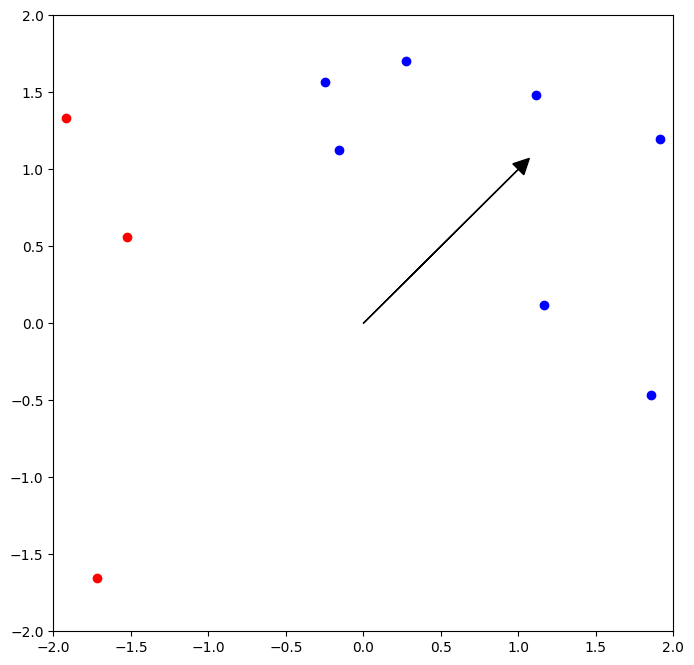

In [52]:
P = np.array([[1, 1]]) # Define um √∫nico plano.
fig, ax1 = plt.subplots(figsize=(8, 8)) # Cria um gr√°fico

plot_vectors([P], axes=[2, 2], ax=ax1) # Plota o plano P como um vetor

# Plota pontos aleat√≥rios.
for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2)) # Obt√©m um par de n√∫meros aleat√≥rios entre -2 e 2
        side_of_plane = np.sign(np.dot(P, v1.T)) 
        
        # Colore os pontos dependendo do sinal do resultado de np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plota pontos azuis
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plota pontos vermelhos

plt.show()

A primeira coisa a notar √© que o vetor que define o plano n√£o marca a fronteira entre os dois lados do plano. Ele marca a dire√ß√£o em que voc√™ encontra o lado 'positivo' do plano. N√£o √© intuitivo!

Se quisermos plotar o plano de separa√ß√£o, precisamos plotar uma linha que seja perpendicular ao nosso vetor `P`. Podemos obter tal linha usando uma matriz de rota√ß√£o de $90^o$.

Sinta-se √† vontade para mudar a dire√ß√£o do plano `P`.

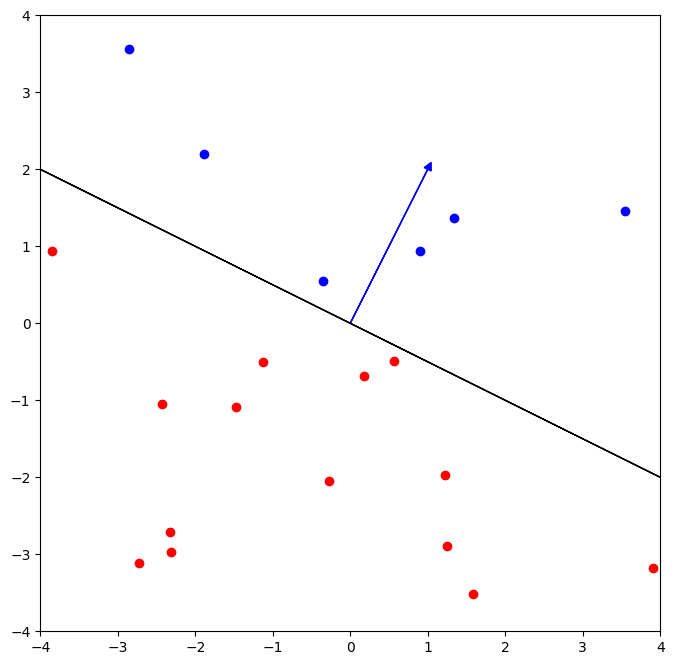

In [53]:
P = np.array([[1, 2]])  # Define um √∫nico plano. Voc√™ pode mudar a dire√ß√£o

# Obtenha um novo plano perpendicular a P. Usamos uma matriz de rota√ß√£o
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) # Cria um gr√°fico com tamanho personalizado

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plota o plano P como um vetor

# Plota o plano P como 2 vetores.
# N√≥s escalamos por 2 apenas para obter as setas fora da caixa atual
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plota 20 pontos aleat√≥rios.
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Obt√©m um par de n√∫meros aleat√≥rios entre -4 e 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) # Obt√©m o sinal do produto escalar com P
        # Colore os pontos dependendo do sinal do resultado de np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plota um ponto azul
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plota um ponto vermelho

plt.show()

Agora, vamos ver o que est√° dentro do c√≥digo que colore os pontos.

In [54]:
P = np.array([[1, 1]])      # Plano √∫nico
v1 = np.array([[1, 2]])     # Ponto de exemplo 1
v2 = np.array([[-1, 1]])    # Ponto de exemplo 2
v3 = np.array([[-2, -1]])   # Ponto de exemplo 3

In [55]:
def side_of_plane(P, v):
    return np.sign(np.dot(P, v.T))

print(side_of_plane(P, v1)) # Deve retornar 1
print(side_of_plane(P, v2)) # Deve retornar 1
print(side_of_plane(P, v3)) # Deve retornar -1

[[1]]
[[0]]
[[-1]]


In [56]:
np.dot(P, v1.T)

array([[3]])

In [57]:
np.dot(P, v2.T)

array([[0]])

In [58]:
np.dot(P, v3.T)

array([[-3]])

A fun√ß√£o abaixo verifica de qual lado do plano `P` est√° localizado o vetor `v`.

In [59]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Obt√©m o produto escalar P * v'
    sign_of_dot_product = np.sign(dotproduct) # O sinal dos elementos da matriz de produto escalar
    sign_of_dot_product_scalar = sign_of_dot_product.item() # O valor do primeiro item
    return sign_of_dot_product_scalar

In [60]:
side_of_plane(P, v1) # Onde cada lado est√° [1,2]

1

In [61]:
side_of_plane(P, v2) # Onde cada lado est√° [-1, 1]

0

In [62]:
side_of_plane(P, v3) # Onde cada lado est√° [-2, -1]

-1


## Fun√ß√£o de Hash com m√∫ltiplos planos

Na pr√≥xima se√ß√£o, vamos definir uma fun√ß√£o de hash com uma lista de tr√™s planos personalizados em 2D.


In [63]:
P1 = np.array([[1, 1]])   # Primeiro plano 2D
P2 = np.array([[-1, 1]])  # Segundo plano 2D
P3 = np.array([[-1, -1]]) # Terceiro plano 2D
P_l = [P1, P2, P3]  # Lista de arrays. √â o multi plano

# Vetor para busca
v = np.array([[2, 2]])


A pr√≥xima fun√ß√£o cria um valor de hash com base em um conjunto de planos. O valor de sa√≠da √© uma combina√ß√£o do lado do plano onde o vetor est√° localizado em rela√ß√£o √† cole√ß√£o de planos.

Podemos pe

In [64]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [65]:
hash_multi_plane(P_l, v)

3

## Planos Aleat√≥rios

No trecho de c√≥digo abaixo, criamos um conjunto de tr√™s planos aleat√≥rios:


In [66]:
np.random.seed(0)
num_dimensions = 2 # √© 300 na tarefa
num_planes = 3 # √© 10 na tarefa
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

v = np.array([[2, 2]])

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


A pr√≥xima fun√ß√£o √© semelhante √† fun√ß√£o `side_of_plane()`, mas ela avalia mais de um plano de cada vez. O resultado √© uma matriz com os lados do plano de `v`, para o conjunto de planos `P`.

In [67]:
# Fun√ß√£o do lado do plano. O resultado √© uma matriz
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct) # Obt√©m um valor booleano informando se o valor na c√©lula √© positivo ou negativo
    return sign_of_dot_product

Obtendo o lado do plano do vetor `[2, 2]` para o conjunto de planos aleat√≥rios:

In [68]:
sides_l = side_of_plane_matrix(random_planes_matrix, v)
print(sides_l)

[[1.]
 [1.]
 [1.]]


Agora, vamos usar a fun√ß√£o anterior para definir nossa fun√ß√£o de hash com m√∫ltiplos planos:

In [69]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Obt√©m o lado dos planos para P e v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Obt√©m o valor dentro da c√©lula da matriz
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i # soma 2^i * hash_i
        
    return hash_value

Imprime o hash bucket para o vetor `v = [2, 2]`.

In [70]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

#### Nota
Isto mostrou como criar um conjunto de planos aleat√≥rios. Voc√™ far√° m√∫ltiplos conjuntos de planos aleat√≥rios para tornar os vizinhos aproximados mais precisos.

## Vetores de Documentos

Antes de terminarmos este laborat√≥rio, lembre-se de que voc√™ pode representar um documento como um vetor somando os vetores das palavras contidas no documento. Neste exemplo, nossa incorpora√ß√£o cont√©m apenas tr√™s palavras, cada uma representada por um array 3D.


In [71]:
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word, 0)
    
print(document_embedding)

[1 0 3]



Neste c√≥digo, o documento √© representado como a soma dos vetores das palavras contidas nele. Se uma palavra n√£o estiver no dicion√°rio de embeddings (`word_embedding`), o valor padr√£o `0` ser√° usado.

# Approximate nearest neighbors

Voc√™ aprendeu sobre hashing sens√≠vel √† localidade, agora √© hora de colocar todo esse conhecimento em uso. Vamos vai criar um algoritmo que calcula os k vizinhos mais pr√≥ximos de forma muito mais r√°pida do que a busca exaustiva. 

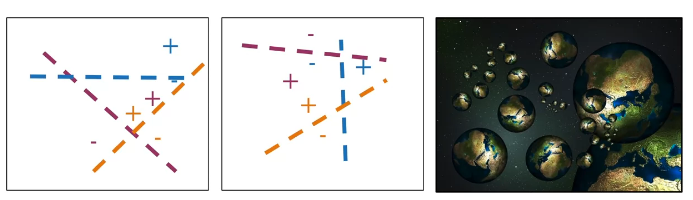

Vimos que alguns planos, como estes tr√™s, podem dividir o espa√ßo vetorial em regi√µes. Mas ser√° que esses planos s√£o a melhor maneira de dividir o espa√ßo vetorial? E se, em vez disso, voc√™ dividisse o espa√ßo vetorial igual na figura 2? Na verdade, voc√™ n√£o pode saber com certeza quais conjuntos de planos s√£o a melhor maneira de dividir o espa√ßo vetorial. Ent√£o, por que n√£o criar v√°rios conjuntos de planos aleat√≥rios? Dessa forma, voc√™ pode dividir o espa√ßo vetorial em v√°rios conjuntos independentes de tabelas hash. Voc√™ pode pensar nisso como criar v√°rias c√≥pias do universo ou um multiverso, se preferir. Voc√™ pode usar todos esses diferentes conjuntos de planos aleat√≥rios para ajudar a encontrar um bom conjunto de vetores vizinhos amig√°veis. Quero dizer, um conjunto de k vizinhos mais pr√≥ximos.

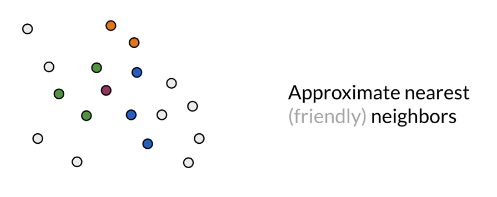

Voltando aos nossos m√∫ltiplos conjuntos de planos aleat√≥rios, aqui, por exemplo, vamos supor que voc√™ tenha um espa√ßo vetorial. E esse ponto magenta no meio representa a transforma√ß√£o de uma palavra em ingl√™s para um vetor de palavra em franc√™s. Voc√™ est√° tentando encontrar outros vetores de palavras em franc√™s que possam ser semelhantes, ent√£o talvez um universo de planos aleat√≥rios nos ajude a determinar que esse vetor magenta e esses vetores verdes s√£o todos atribu√≠dos aos mesmos compartimentos hash. Outro conjunto completamente diferente de planos aleat√≥rios nos ajudou a determinar que esses vetores azuis est√£o nos mesmos compartimentos hash que o vetor vermelho. Um terceiro conjunto de planos aleat√≥rios nos ajudou a determinar que esses vetores laranja est√£o nos mesmos compartimentos hash que o vetor magenta.

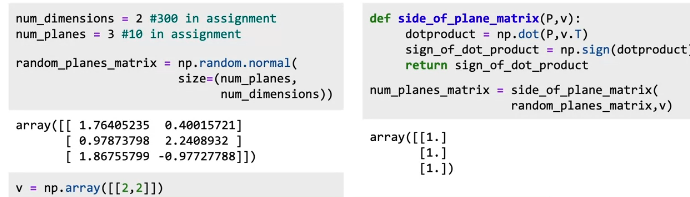

Usando m√∫ltiplos conjuntos de planos aleat√≥rios para hashing sens√≠vel √† localidade, voc√™ tem uma maneira mais robusta de pesquisar no espa√ßo vetorial um conjunto de vetores que s√£o poss√≠veis candidatos a serem os vizinhos mais pr√≥ximos. Isso √© chamado de vizinhos mais pr√≥ximos aproximados, porque voc√™ n√£o est√° pesquisando o espa√ßo vetorial inteiro, mas apenas um subconjunto dele. Portanto, n√£o s√£o os k vizinhos mais pr√≥ximos absolutos, mas s√£o aproximadamente os k vizinhos mais pr√≥ximos. Voc√™ sacrifica um pouco de precis√£o para ganhar efici√™ncia na sua busca, ent√£o vamos ver como fazer um conjunto de planos aleat√≥rios em c√≥digo. Supondo que seus vetores de palavras tenham duas dimens√µes e voc√™ queira gerar tr√™s planos aleat√≥rios. Voc√™ usar√° `np.random.normal` para gerar uma matriz de tr√™s linhas e duas colunas. Como voc√™ pode ver, voc√™ criar√° um vetor v e, para cada plano aleat√≥rio, ver√° de que lado do plano o vetor est√°. Assim, voc√™ descobrir√° se o vetor v est√° no lado positivo ou negativo de cada um desses tr√™s planos. Observe que, em vez de usar um la√ßo for para trabalhar com um plano de cada vez, voc√™ pode usar `np.dot` para fazer isso em um passo. Vamos chamar a fun√ß√£o, o resultado √© que o vetor v est√° no lado positivo de cada um dos tr√™s planos aleat√≥rios.

# Searching documents

Como voc√™ pode usar a busca r√°pida dos k-vizinhos mais pr√≥ximos para pesquisar trechos de texto relacionados a uma consulta em uma grande cole√ß√£o de documentos. Voc√™ simplesmente cria vetores para ambos e encontra os vizinhos mais pr√≥ximos.

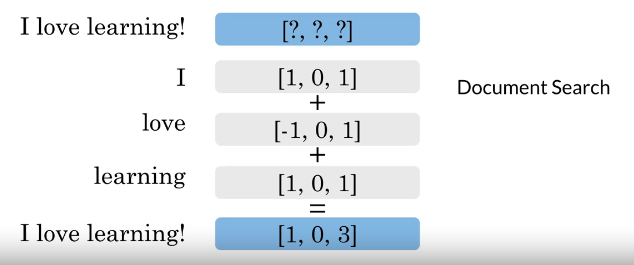

Para se preparar para realizar a busca de documentos, primeiro, pense em como representar documentos como vetores em vez de apenas palavras como vetores. Digamos que voc√™ tenha esses documentos compostos por tr√™s palavras: Eu amo aprender. Como voc√™ pode representar todo este documento como um vetor? 

Bem, voc√™ pode encontrar os vetores de palavras para cada palavra individual: Eu, amo, aprender e, em seguida, apenas som√°-los. Assim, a soma de todos esses vetores de palavras se torna um vetor de documento com a mesma dimens√£o que os vetores de palavras. Neste caso, tr√™s dimens√µes. Voc√™ pode ent√£o aplicar a busca de documentos usando k-vizinhos mais pr√≥ximos.

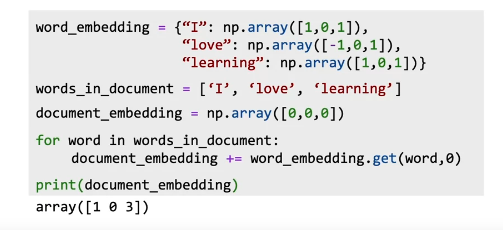

Vamos fazer isso, criando um mini dicion√°rio para as incorpora√ß√µes de palavras. Aqui est√° a lista de palavras contidas no documento. Voc√™ vai inicializar a incorpora√ß√£o do documento como uma matriz de zeros. Agora, para cada palavra em um documento, voc√™ obter√° o vetor da palavra se a palavra existir no dicion√°rio, caso contr√°rio, zero. Voc√™ soma tudo isso e retorna a incorpora√ß√£o do documento.

# Naive Machine Translation and LSH

## Tradu√ß√£o Autom√°tica Ing√™nua e LSH

Vamos implementar um sistema de tradu√ß√£o autom√°tica e ver como funciona o hashing sens√≠vel √† localidade.

In [78]:
import pdb
import pickle
import string
import time
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords, twitter_samples
from os import getcwd

In [74]:
# adicionar pasta, tmp2, do nosso espa√ßo de trabalho local contendo arquivos de corpora pr√©-baixados ao caminho de dados do nltk
filePath = f"{getcwd()}/tmp2/"
nltk.data.path.append(filePath)

## Os Dados de Embeddings de Palavras para Palavras em Ingl√™s e Franc√™s

Vamos criar um programa que traduza do ingl√™s para o franc√™s. Usaremos um subconjunto de embeddings de palavras.

In [89]:
en_embeddings_subset = pickle.load(open("en_embeddings.p", "rb"))
fr_embeddings_subset = pickle.load(open("fr_embeddings.p", "rb"))

#### Olhando os dados

* en_embeddings_subset: a chave √© uma palavra em ingl√™s, e o valor √© um array de 300 dimens√µes, que √© o embedding para essa palavra.
```
'the': array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281, ....
```

* fr_embeddings_subset: a chave √© uma palavra em franc√™s, e o valor √© um array de 300 dimens√µes, que √© o embedding para essa palavra.
```
'la': array([-6.18250e-03, -9.43867e-04, -8.82648e-03,  3.24623e-02,...

#### Carregar dois dicion√°rios que mapeiam palavras do ingl√™s para o franc√™s
* Um dicion√°rio de treinamento
* e um dicion√°rio de teste.

In [90]:
def get_dict(file_name):
    """
    Esta fun√ß√£o retorna o dicion√°rio de ingl√™s para franc√™s dado um arquivo onde cada coluna corresponde a uma palavra.
    Verifique os arquivos que esta fun√ß√£o utiliza no seu espa√ßo de trabalho.
    """
    my_file = pd.read_csv(file_name, delimiter=' ')
    etof = {}  # o dicion√°rio de ingl√™s para franc√™s a ser retornado
    for i in range(len(my_file)):
        # indexando nas linhas.
        en = my_file.loc[i][0]
        fr = my_file.loc[i][1]
        etof[en] = fr

    return etof

In [91]:
# carregando os dicion√°rios de ingl√™s para franc√™s
en_fr_train = get_dict('en-fr.train.txt')
print('O tamanho do dicion√°rio de treinamento de ingl√™s para franc√™s √©', len(en_fr_train))
en_fr_test = get_dict('en-fr.test.txt')
print('O tamanho do dicion√°rio de teste de ingl√™s para franc√™s √©', len(en_fr_test))

O tamanho do dicion√°rio de treinamento de ingl√™s para franc√™s √© 5000
O tamanho do dicion√°rio de teste de ingl√™s para franc√™s √© 1500



#### Olhando o dicion√°rio ingl√™s-franc√™s

* `en_fr_train` √© um dicion√°rio onde a chave √© a palavra em ingl√™s e o valor √© a tradu√ß√£o em franc√™s dessa palavra em ingl√™s.
```
{'the': 'la',
 'and': 'et',
 'was': '√©tait',
 'for': 'pour',
```

* `en_fr_test` √© similar a `en_fr_train`, mas √© um conjunto de teste. N√£o olharemos para ele at√© chegarmos aos testes.

### Gerar Matrizes de Embeddings e Transforma√ß√£o


### get_matrices

Traduzindo dicion√°rio de ingl√™s para franc√™s usando embeddings.

Agora vamos implementar uma fun√ß√£o `get_matrices`, que recebe os dados carregados e retorna as matrizes `X` e `Y`.

Entradas:
- `en_fr` : Dicion√°rio de ingl√™s para franc√™s
- `en_embeddings` : Dicion√°rio de embeddings em ingl√™s
- `fr_embeddings` : Dicion√°rio de embeddings em franc√™s

Retorna:
- Matriz `X` e matriz `Y`, onde cada linha em X √© o embedding de uma palavra em ingl√™s, e a mesma linha em Y √© o embedding da vers√£o francesa dessa palavra em ingl√™s.

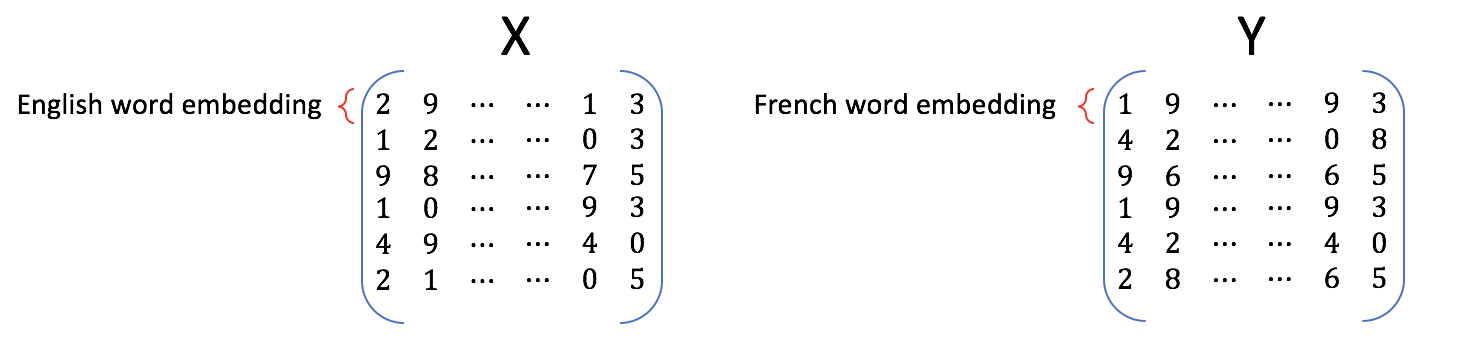


In [92]:
def get_matrices(en_fr, french_vecs, english_vecs):
    """
    Cria matrizes de embeddings de palavras para palavras em ingl√™s e franc√™s que s√£o mapeadas umas √†s outras.
    
    Entradas:
        en_fr: Dicion√°rio mapeando palavras em ingl√™s para palavras em franc√™s.
        french_vecs: Dicion√°rio de embeddings de palavras em franc√™s.
        english_vecs: Dicion√°rio de embeddings de palavras em ingl√™s.
    
    Sa√≠das: 
        X: Matriz com cada linha sendo o embedding de uma palavra em ingl√™s. A forma √© (number_of_words, embedding_size).
        Y: Matriz com cada linha sendo o embedding da palavra francesa correspondente. A forma √© igual a X.
    
    Nota:
        Esta fun√ß√£o n√£o computa ou retorna uma matriz de proje√ß√£o.
    """

    # X_l e Y_l s√£o listas dos embeddings de palavras em ingl√™s e franc√™s
    X_l = list()
    Y_l = list()

    # loop atrav√©s de todos os pares de palavras em ingl√™s e franc√™s no dicion√°rio ingl√™s-franc√™s
    for en_word, fr_word in en_fr.items():

        # verifica se a palavra francesa tem um embedding e se a palavra inglesa tem um embedding
        if fr_word in french_vecs and en_word in english_vecs:

            # obt√©m o embedding em ingl√™s
            en_vec = english_vecs[en_word]

            # obt√©m o embedding em franc√™s
            fr_vec = french_vecs[fr_word]

            # adiciona o embedding em ingl√™s √† lista
            X_l.append(en_vec)

            # adiciona o embedding em franc√™s √† lista
            Y_l.append(fr_vec)

    # empilha os vetores de X_l em uma matriz X
    X = np.stack(X_l)

    # empilha os vetores de Y_l em uma matriz Y
    Y = np.stack(Y_l)
    
    return X, Y

Agora usaremos a fun√ß√£o `get_matrices()` para obter os conjuntos `X_train` e `Y_train` de embeddings de palavras em ingl√™s e franc√™s nos correspondentes modelos de espa√ßo vetorial.

In [93]:
# obtendo o conjunto de treinamento:
X_train, Y_train = get_matrices(
    en_fr_train, fr_embeddings_subset, en_embeddings_subset)

## Tradu√ß√µes

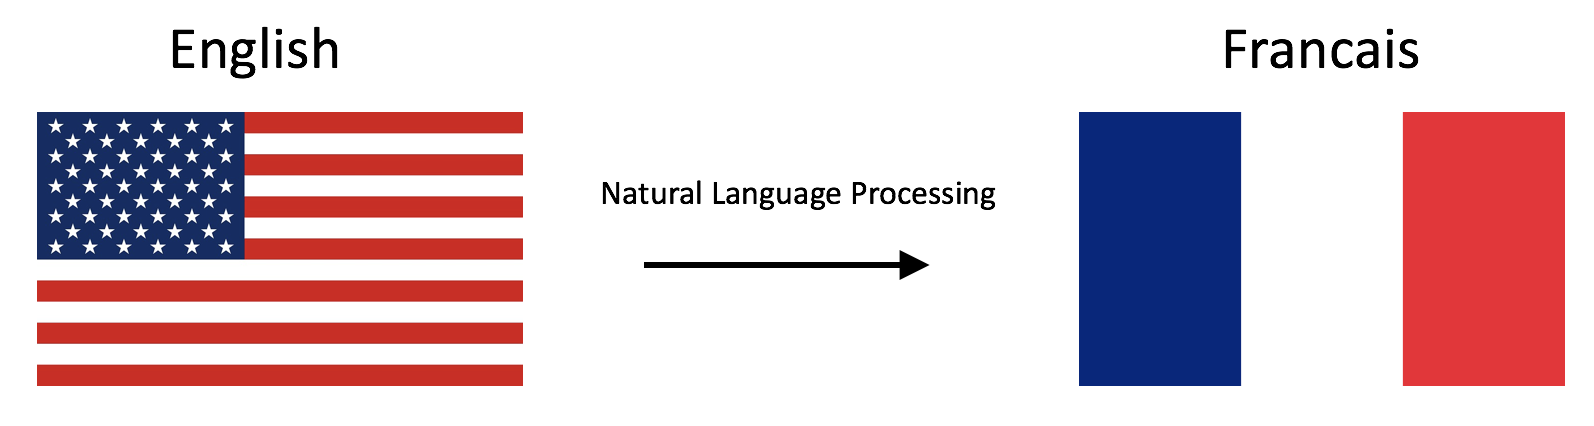


### Tradu√ß√£o como Transforma√ß√£o Linear de Embeddings

Dado dicion√°rios de embeddings de palavras em ingl√™s e franc√™s, voc√™ criar√° uma matriz de transforma√ß√£o `R`.
* Dado um embedding de palavra em ingl√™s, $\mathbf{e}$, voc√™ pode multiplicar $\mathbf{eR}$ para obter um novo embedding de palavra $\mathbf{f}$.
    * Tanto $\mathbf{e}$ quanto $\mathbf{f}$ s√£o [vetores linha](https://en.wikipedia.org/wiki/Row_and_column_vectors).
* Voc√™ pode ent√£o calcular os vizinhos mais pr√≥ximos de `f` nos embeddings em franc√™s e recomendar a palavra que √© mais similar ao embedding transformado.

#### Descrevendo a tradu√ß√£o como um problema de minimiza√ß√£o

Encontre uma matriz `R` que minimize a seguinte equa√ß√£o.

$$\arg \min _{\mathbf{R}}\| \mathbf{X R} - \mathbf{Y}\|_{F}\tag{1} $$

#### Norma de Frobenius

A norma de Frobenius de uma matriz $A$ (assumindo que √© de dimens√£o $m,n$) √© definida como a raiz quadrada da soma dos quadrados absolutos de seus elementos:

$$\|\mathbf{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}\tag{2}$$

#### Fun√ß√£o de perda real
Em aplica√ß√µes do mundo real, a perda da norma de Frobenius:

$$\| \mathbf{XR} - \mathbf{Y}\|_{F}$$

√© frequentemente substitu√≠da pelo seu valor ao quadrado dividido por $m$:

$$ \frac{1}{m} \|  \mathbf{X R} - \mathbf{Y} \|_{F}^{2}$$

onde $m$ √© o n√∫mero de exemplos (linhas em $\mathbf{X}$).

* A mesma matriz `R` √© encontrada ao usar esta fun√ß√£o de perda versus a norma de Frobenius original.
* A raz√£o para tomar o quadrado √© que √© mais f√°cil calcular o gradiente da norma de Frobenius ao quadrado.
* A raz√£o para dividir por $m$ √© que estamos mais interessados na perda m√©dia por embedding do que na perda para todo o conjunto de treinamento.
    * A perda para todo o conjunto de treinamento aumenta com mais palavras (exemplos de treinamento), 
    ent√£o tomar a m√©dia nos ajuda a acompanhar a perda m√©dia independentemente do tamanho do conjunto de treinamento.

#### Implementando o mecanismo de tradu√ß√£o descrito nesta se√ß√£o.


### compute_loss

#### Calculando a perda
* A fun√ß√£o de perda ser√° a norma de Frobenius ao quadrado da diferen√ßa entre a matriz e sua aproxima√ß√£o, dividida pelo n√∫mero de exemplos de treinamento $m$.
* Sua f√≥rmula √©:
$$ L(X, Y, R)=\frac{1}{m}\sum_{i=1}^{m} \sum_{j=1}^{n}\left( a_{i j} \right)^{2}$$

onde $a_{i j}$ √© o valor na linha $i$ e coluna $j$ da matriz $\mathbf{XR}-\mathbf{Y}$.

In [94]:
def compute_loss(X, Y, R):
    '''
    Entradas: 
        X: uma matriz de dimens√£o (m,n) onde as colunas s√£o os embeddings em ingl√™s.
        Y: uma matriz de dimens√£o (m,n) onde as colunas correspondem aos embeddings em franc√™s.
        R: uma matriz de dimens√£o (n,n) - matriz de transforma√ß√£o do espa√ßo vetorial de embeddings em ingl√™s para franc√™s.
    Sa√≠das:
        L: uma matriz de dimens√£o (m,n) - o valor da fun√ß√£o de perda para os dados X, Y e R.
    '''
 
    # m √© o n√∫mero de linhas em X
    m = len(X)
        
    # diff √© XR - Y    
    diff = np.dot(X, R) - Y

    # diff_squared √© o quadrado elemento a elemento da diferen√ßa    
    diff_squared = np.square(diff)

    # sum_diff_squared √© a soma dos elementos ao quadrado
    sum_diff_squared = np.sum(diff_squared)

    # loss √© a sum_diff_squared dividida pelo n√∫mero de exemplos (m)
    loss = sum_diff_squared / m

    return loss

### compute_gradient

#### Calculando o gradiente da perda em rela√ß√£o √† matriz de transforma√ß√£o R

* Calcule o gradiente da perda em rela√ß√£o √† matriz de transforma√ß√£o `R`.
* O gradiente √© uma matriz que codifica quanto uma pequena mudan√ßa em `R` afeta a mudan√ßa na fun√ß√£o de perda.
* O gradiente nos d√° a dire√ß√£o na qual devemos diminuir `R` para minimizar a perda.
* `m` √© o n√∫mero de exemplos de treinamento (n√∫mero de linhas em `X`).
* A f√≥rmula para o gradiente da fun√ß√£o de perda $ùêø(ùëã,ùëå,ùëÖ)$ √©:

$$\frac{d}{dR}ùêø(ùëã,ùëå,ùëÖ)=\frac{d}{dR}\Big(\frac{1}{m}\| X R -Y\|_{F}^{2}\Big) = \frac{2}{m}X^{T} (X R - Y)$$

In [95]:
def compute_gradient(X, Y, R):
    '''
    Entradas: 
        X: uma matriz de dimens√£o (m,n) onde as colunas s√£o os embeddings em ingl√™s.
        Y: uma matriz de dimens√£o (m,n) onde as colunas correspondem aos embeddings em franc√™s.
        R: uma matriz de dimens√£o (n,n) - matriz de transforma√ß√£o dos embeddings do espa√ßo vetorial em ingl√™s para franc√™s.
    Sa√≠das:
        g: um valor escalar - gradiente da fun√ß√£o de perda L para os dados X, Y e R.
    '''
    # m √© o n√∫mero de linhas em X
    m = len(X)

    # gradiente √© X^T(XR - Y) * 2/m    
    gradient = X.T @ (np.dot(X,R) - Y) * (2/m)
    
    return gradient

#### Encontrando o R √≥timo com o Algoritmo de Descida do Gradiente

##### Descida do Gradiente

[Descida do gradiente](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html) √© um algoritmo iterativo usado na busca do √≥timo da fun√ß√£o.
* Anteriormente, mencionamos que o gradiente da perda em rela√ß√£o √† matriz codifica quanto uma pequena mudan√ßa em alguma coordenada dessa matriz afeta a mudan√ßa da fun√ß√£o de perda.
* A descida do gradiente usa essa informa√ß√£o para mudar iterativamente a matriz `R` at√© atingirmos um ponto onde a perda √© minimizada.

Para implementar o algoritmo de descida do gradiente para alinhar os embeddings, voc√™ vai seguir esses passos:

1. Calcule o gradiente da perda em rela√ß√£o √† matriz $R$.
2. Atualize $R$ com a f√≥rmula:
$$R_{\text{new}}= R_{\text{old}}-\alpha g$$

Onde $\alpha$ √© a taxa de aprendizado, que √© um escalar.

Vamos implementar a fun√ß√£o `align_embeddings`:

In [96]:
def align_embeddings(X, Y, train_steps=100, learning_rate=0.0003, verbose=True, compute_loss=compute_loss, compute_gradient=compute_gradient):
    '''
    Entradas:
        X: uma matriz de dimens√£o (m,n) onde as colunas s√£o os embeddings em ingl√™s.
        Y: uma matriz de dimens√£o (m,n) onde as colunas correspondem aos embeddings em franc√™s.
        train_steps: int positivo - descreve quantos passos o algoritmo de descida do gradiente far√°.
        learning_rate: float positivo - descreve qu√£o grandes ser√£o os passos do algoritmo de descida do gradiente.
    Sa√≠das:
        R: uma matriz de dimens√£o (n,n) - a matriz de proje√ß√£o que minimiza a norma F ||X R -Y||^2
    '''
    np.random.seed(129)

    # o n√∫mero de colunas em X √© o n√∫mero de dimens√µes para um vetor de palavras (por exemplo, 300)
    # R √© uma matriz quadrada com comprimento igual ao n√∫mero de dimens√µes no embedding de palavras
    R = np.random.rand(X.shape[1], X.shape[1])

    for i in range(train_steps):
        if verbose and i % 25 == 0:
            print(f"loss at iteration {i} is: {compute_loss(X, Y, R):.4f}")

        # use a fun√ß√£o que voc√™ definiu para calcular o gradiente
        gradient = compute_gradient(X, Y, R)

        # atualize R subtraindo a taxa de aprendizado vezes o gradiente
        R -= learning_rate * gradient

    return R

#### Calcular a Matriz de Transforma√ß√£o \( \mathbf{R} \)

Usando apenas o conjunto de treinamento, encontre a matriz de transforma√ß√£o \( \mathbf{R} \) chamando a fun√ß√£o `align_embeddings()`.

In [97]:
R_train = align_embeddings(X_train, Y_train, train_steps=400, learning_rate=0.8)

loss at iteration 0 is: 963.0146
loss at iteration 25 is: 97.8292
loss at iteration 50 is: 26.8329
loss at iteration 75 is: 9.7893
loss at iteration 100 is: 4.3776
loss at iteration 125 is: 2.3281
loss at iteration 150 is: 1.4480
loss at iteration 175 is: 1.0338
loss at iteration 200 is: 0.8251
loss at iteration 225 is: 0.7145
loss at iteration 250 is: 0.6534
loss at iteration 275 is: 0.6185
loss at iteration 300 is: 0.5981
loss at iteration 325 is: 0.5858
loss at iteration 350 is: 0.5782
loss at iteration 375 is: 0.5735


### Testando a Tradu√ß√£o

#### Algoritmo k-Nearest Neighbors

O [algoritmo k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) 
* O k-NN √© um m√©todo que recebe um vetor como entrada e encontra os outros vetores no conjunto de dados que s√£o mais pr√≥ximos dele.
* O 'k' √© o n√∫mero de "vizinhos mais pr√≥ximos" a serem encontrados (por exemplo, k=2 encontra os dois vizinhos mais pr√≥ximos).

#### Buscando o Embedding da Tradu√ß√£o
Como estamos aproximando a fun√ß√£o de tradu√ß√£o de embeddings do ingl√™s para o franc√™s por meio de uma matriz de transforma√ß√£o linear $ \mathbf{R} $, na maioria das vezes n√£o obteremos o embedding exato de uma palavra em franc√™s ao transformar o embedding $ \mathbf{e} $ de alguma palavra em ingl√™s particular para o espa√ßo de embeddings em franc√™s.
* √â aqui que o k-NN se torna muito √∫til! Ao usar o 1-NN com $ \mathbf{eR} $ como entrada, podemos buscar um embedding $ \mathbf{f} $ (como uma linha) na matriz $ \mathbf{Y} $ que √© o mais pr√≥ximo do vetor transformado $ \mathbf{eR} $.

#### Similaridade Cosseno
A similaridade cosseno entre vetores $ u $ e $ v $ √© calculada como o cosseno do √¢ngulo entre eles.
A f√≥rmula √©

$$\cos(u,v)=\frac{u \cdot v}{\left\|u\right\| \left\|v\right\|}$$

* $ \cos(u,v) = 1 $ quando $ u $ e $ v $ est√£o na mesma linha e t√™m a mesma dire√ß√£o.
* $ \cos(u,v) = -1 $ quando t√™m dire√ß√µes exatamente opostas.
* $ \cos(u,v) = 0 $ quando os vetores s√£o ortogonais (perpendiculares) entre si.

#### Nota: Dist√¢ncia e similaridade s√£o praticamente opostos.
* Podemos obter uma m√©trica de dist√¢ncia a partir da similaridade cosseno, mas a similaridade cosseno n√£o pode ser usada diretamente como a m√©trica de dist√¢ncia.
* Quando a similaridade cosseno aumenta (em dire√ß√£o a 1), a "dist√¢ncia" entre os dois vetores diminui (em dire√ß√£o a 0).
* Podemos definir a dist√¢ncia cosseno entre $ u $ e $ v $ como
$$d_{\text{cos}}(u,v)=1-\cos(u,v)$$

### nearest_neighbor

fun√ß√£o `nearest_neighbor()`

Entradas:
* Vetor `v`,
* Um conjunto de poss√≠veis vizinhos mais pr√≥ximos `candidates`
* `k` vizinhos mais pr√≥ximos a encontrar.
* A m√©trica de dist√¢ncia deve ser baseada na similaridade cosseno.
* Itere sobre as linhas em `candidates`, e salve o resultado das similaridades entre a linha atual e o vetor `v` em uma lista Python. Certifique-se de que as similaridades estejam na mesma ordem que os vetores de linha dos `candidates`.
* Agora voc√™ pode usar [numpy argsort]( https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html#numpy.argsort) para classificar os √≠ndices das linhas dos `candidates`.

In [99]:
def cosine_similarity(A, B):
    '''
    Entrada:
        A: um array numpy que corresponde a um vetor de palavra
        B: um array numpy que corresponde a um vetor de palavra
    Sa√≠da:
        cos: n√∫mero num√©rico representando a similaridade cosseno entre A e B.
    '''
    # voc√™ deve definir esta vari√°vel para o valor verdadeiro.
    cos = -10    
    dot = np.dot(A, B)
    normb = np.linalg.norm(B)
    
    if len(A.shape) == 1: # Se A √© apenas um vetor, obtemos a norma
        norma = np.linalg.norm(A)
        cos = dot / (norma * normb)
    else: # Se A √© uma matriz, ent√£o calculamos as normas dos vetores de palavras da matriz (norma de cada linha)
        norma = np.linalg.norm(A, axis=1)
        epsilon = 1.0e-9 # para evitar divis√£o por 0
        cos = dot / (norma * normb + epsilon)
        
    return cos

In [100]:
def nearest_neighbor(v, candidates, k=1, cosine_similarity=cosine_similarity):
    """
    Entrada:
      - v: o vetor para o qual voc√™ est√° procurando o vizinho mais pr√≥ximo
      - candidates: um conjunto de vetores onde encontraremos os vizinhos
      - k: top k vizinhos mais pr√≥ximos a encontrar
    Sa√≠da:
      - k_idx: os √≠ndices dos k vetores mais pr√≥ximos classificados
    """

    similarity_l = []

    # para cada vetor candidato...
    for row in candidates:
        # obter a similaridade cosseno
        cos_similarity = cosine_similarity(v, row)

        # adicionar a similaridade √† lista
        similarity_l.append(cos_similarity)

    # ordenar a lista de similaridade e obter os √≠ndices da lista classificada    
    sorted_ids = np.argsort(similarity_l)  
    
    # Reverter a ordem do array sorted_ids
    sorted_ids = sorted_ids[::-1]
    
    # obter os √≠ndices dos k vetores candidatos mais semelhantes
    k_idx = sorted_ids[:k]

    return k_idx

#### Testar sua Tradu√ß√£o e Calcular sua Precis√£o

### test_vocabulary

A fun√ß√£o `test_vocabulary` recebe a matriz de embeddings em ingl√™s $ X $, a matriz de embeddings em franc√™s $ Y $ e a matriz $ R $ e retorna a precis√£o das tradu√ß√µes de $ X $ para $ Y $ por $ R $.

* Itere sobre os embeddings transformados das palavras em ingl√™s e verifique se o vetor de palavra em franc√™s mais pr√≥ximo pertence √† palavra francesa que √© a tradu√ß√£o real.
* Obtenha um √≠ndice do embedding franc√™s mais pr√≥ximo usando `nearest_neighbor` (com argumento `k=1`), e compare-o ao √≠ndice do embedding em ingl√™s que voc√™ acabou de transformar.
* Mantenha o controle do n√∫mero de vezes que voc√™ obt√©m a tradu√ß√£o correta.
* Calcule a precis√£o como 

$$\text{precis√£o} = \frac{\#(\text{previs√µes corretas})}{\#(\text{total de previs√µes})}$$

In [101]:
def test_vocabulary(X, Y, R, nearest_neighbor=nearest_neighbor):
    '''
    Entrada:
        X: uma matriz onde as colunas s√£o as representa√ß√µes vetoriais em ingl√™s.
        Y: uma matriz onde as colunas correspondem √†s representa√ß√µes vetoriais em franc√™s.
        R: a matriz de transforma√ß√£o que traduz vetores de palavras do espa√ßo vetorial em ingl√™s para o espa√ßo vetorial em franc√™s.
    Sa√≠da:
        precis√£o: para as tradu√ß√µes de ingl√™s para franc√™s
    '''

    # A predi√ß√£o √© X vezes R
    pred = np.dot(X, R)

    # inicializa o n√∫mero de acertos como zero
    num_correct = 0

    # percorre cada linha em pred (cada vetor transformado)
    for i in range(len(pred)):
        # obt√©m o √≠ndice do vizinho mais pr√≥ximo da predi√ß√£o na linha 'i'; tamb√©m passa os candidatos em Y
        pred_idx = nearest_neighbor(pred[i], Y, k=1, cosine_similarity=cosine_similarity)[0]

        # se o √≠ndice do vizinho mais pr√≥ximo for igual √† linha 'i'...
        if pred_idx == i:
            # incrementa o n√∫mero de acertos em 1.
            num_correct += 1

    # precis√£o √© o n√∫mero de acertos dividido pelo n√∫mero de linhas em 'pred' (tamb√©m n√∫mero de linhas em X)
    accuracy = num_correct / len(pred)
    
    return accuracy


Vamos ver como o seu mecanismo de tradu√ß√£o est√° funcionando com dados n√£o vistos:

In [102]:
X_val, Y_val = get_matrices(en_fr_test, fr_embeddings_subset, en_embeddings_subset)

In [103]:
acc = test_vocabulary(X_val, Y_val, R_train) 
print(f"a precis√£o no conjunto de teste √© {acc:.3f}")

a precis√£o no conjunto de teste √© 0.557


## LSH e Busca de Documentos

Vamos criar uma vers√£o mais eficiente do k-vizinhos mais pr√≥ximos usando hashing sens√≠vel √† localidade. Em seguida, voc√™ aplicar√° isso √† busca de documentos.

* Processar os tweets e representar cada tweet como um vetor (representar um documento com um embedding vetorial).
* Usar hashing sens√≠vel √† localidade e k-vizinhos mais pr√≥ximos para encontrar tweets que s√£o semelhantes a um tweet dado.

In [104]:
# obter os tweets positivos e negativos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = all_positive_tweets + all_negative_tweets

### Obtendo os Embeddings de Documentos

#### Modelos de Documentos Bag-of-Words (BOW)
Documentos textuais s√£o sequ√™ncias de palavras.
* A ordem das palavras faz diferen√ßa. Por exemplo, as frases "Apple pie is better than pepperoni pizza." e "Pepperoni pizza is better than apple pie" t√™m significados opostos devido √† ordem das palavras.
* No entanto, para algumas aplica√ß√µes, ignorar a ordem das palavras pode permitir que treinem um modelo eficiente e ainda assim eficaz.
* Essa abordagem √© chamada de modelo de documentos Bag-of-Words.

#### Embeddings de Documentos
* O embedding de um documento √© criado somando os embeddings de todas as palavras no documento.
* Se n√£o conhecemos o embedding de alguma palavra, podemos ignorar essa palavra.

### get_document_embedding

fun√ß√£o `get_document_embedding()`.

* A fun√ß√£o `get_document_embedding()` codifica o documento inteiro como um "embedding" de documento.
* Ela recebe um documento (como uma string) e um dicion√°rio, `en_embeddings`.
* Processa o documento e procura o embedding correspondente de cada palavra.
* Em seguida, soma esses embeddings e retorna a soma de todos os vetores de palavras do tweet processado.


In [115]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
def process_tweet(tweet):
    """Fun√ß√£o de processamento de tweet.
    Entrada:
        tweet: uma string contendo um tweet
    Sa√≠da:
        tweets_clean: uma lista de palavras contendo o tweet processado
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # Remove tickers do mercado de a√ß√µes, como $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # Remove texto de retweet no estilo antigo "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # Remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    
    # Remove hashtags, apenas o s√≠mbolo # da palavra
    tweet = re.sub(r'#', '', tweet)
    
    # Tokeniza o tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # Remove stopwords
                word not in string.punctuation):  # Remove pontua√ß√£o
            stem_word = stemmer.stem(word)  # Aplica stemming na palavra
            tweets_clean.append(stem_word)

    return tweets_clean

In [116]:
def get_document_embedding(tweet, en_embeddings, process_tweet=process_tweet):
    '''
    Entrada:
        - tweet: uma string
        - en_embeddings: um dicion√°rio de embeddings de palavras
    Sa√≠da:
        - doc_embedding: soma de todos os embeddings de palavras no tweet
    '''
    doc_embedding = np.zeros(300)
    
    # processa o documento em uma lista de palavras (processa o tweet)
    processed_doc = process_tweet(tweet)
    
    for word in processed_doc:
        if word in en_embeddings:
            # adiciona o embedding da palavra ao total corrente para o embedding do documento
            doc_embedding += en_embeddings[word]
    
    return doc_embedding

### get_document_vecs

#### Armazenar todos os vetores de documentos em um dicion√°rio

Agora, vamos armazenar todos os embeddings dos tweets em um dicion√°rio. Implemente `get_document_vecs()`.

In [117]:
def get_document_vecs(all_docs, en_embeddings, get_document_embedding=get_document_embedding):
    '''
    Entrada:
        - all_docs: lista de strings - todos os tweets no nosso conjunto de dados.
        - en_embeddings: dicion√°rio com palavras como chaves e seus embeddings como valores.
    Sa√≠da:
        - document_vec_matrix: matriz de embeddings dos tweets.
        - ind2Doc_dict: dicion√°rio com √≠ndices dos tweets em vecs como chaves e seus embeddings como valores.
    '''

    # a chave do dicion√°rio √© um √≠ndice (inteiro) que identifica um tweet espec√≠fico
    # o valor √© o embedding do documento para esse documento
    ind2Doc_dict = {}

    # esta √© a lista que armazenar√° os vetores dos documentos
    document_vec_l = []

    for i, doc in enumerate(all_docs):

        # obt√©m o embedding do documento do tweet
        doc_embedding = get_document_embedding(doc, en_embeddings)

        # salva o embedding do documento no dicion√°rio ind2Doc_dict no √≠ndice i
        ind2Doc_dict[i] = doc_embedding

        # adiciona o embedding do documento √† lista de vetores de documentos
        document_vec_l.append(doc_embedding)

    # converte a lista de vetores de documentos em uma matriz 2D (cada linha √© um vetor de documento)
    document_vec_matrix = np.vstack(document_vec_l)

    return document_vec_matrix, ind2Doc_dict

In [118]:
document_vecs, ind2Tweet = get_document_vecs(all_tweets, en_embeddings_subset)

In [119]:
print(f"Tamanho do dicion√°rio {len(ind2Tweet)}")
print(f"shape do document_vecs {document_vecs.shape}")

Tamanho do dicion√°rio 10000
shape do document_vecs (10000, 300)


### Procurando os Tweets

Agora voc√™ tem um vetor de dimens√£o $(m, d)$, onde $m$ √© o n√∫mero de tweets (10.000) e $d$ √© a dimens√£o dos embeddings (300). Agora voc√™ ir√° inserir um tweet e usar a similaridade de cosseno para ver qual tweet em nosso corpus √© similar ao seu tweet.

In [120]:
my_tweet = 'i am sad'
process_tweet(my_tweet)
tweet_embedding = get_document_embedding(my_tweet, en_embeddings_subset)

In [121]:
# isso te d√° um tweet semelhante ao seu input.
# essa implementa√ß√£o √© vetorizada...
idx = np.argmax(cosine_similarity(document_vecs, tweet_embedding))
print(all_tweets[idx])

@hanbined sad pray for me :(((


### Encontrando os Tweets Mais Similares com LSH

Agora voc√™ implementar√° o hashing sens√≠vel √† localidade (LSH) para identificar o tweet mais similar.
* Em vez de examinar todos os 10.000 vetores, voc√™ pode simplesmente procurar em um subconjunto para encontrar seus vizinhos mais pr√≥ximos.

Vamos supor que seus pontos de dados est√£o plotados assim:

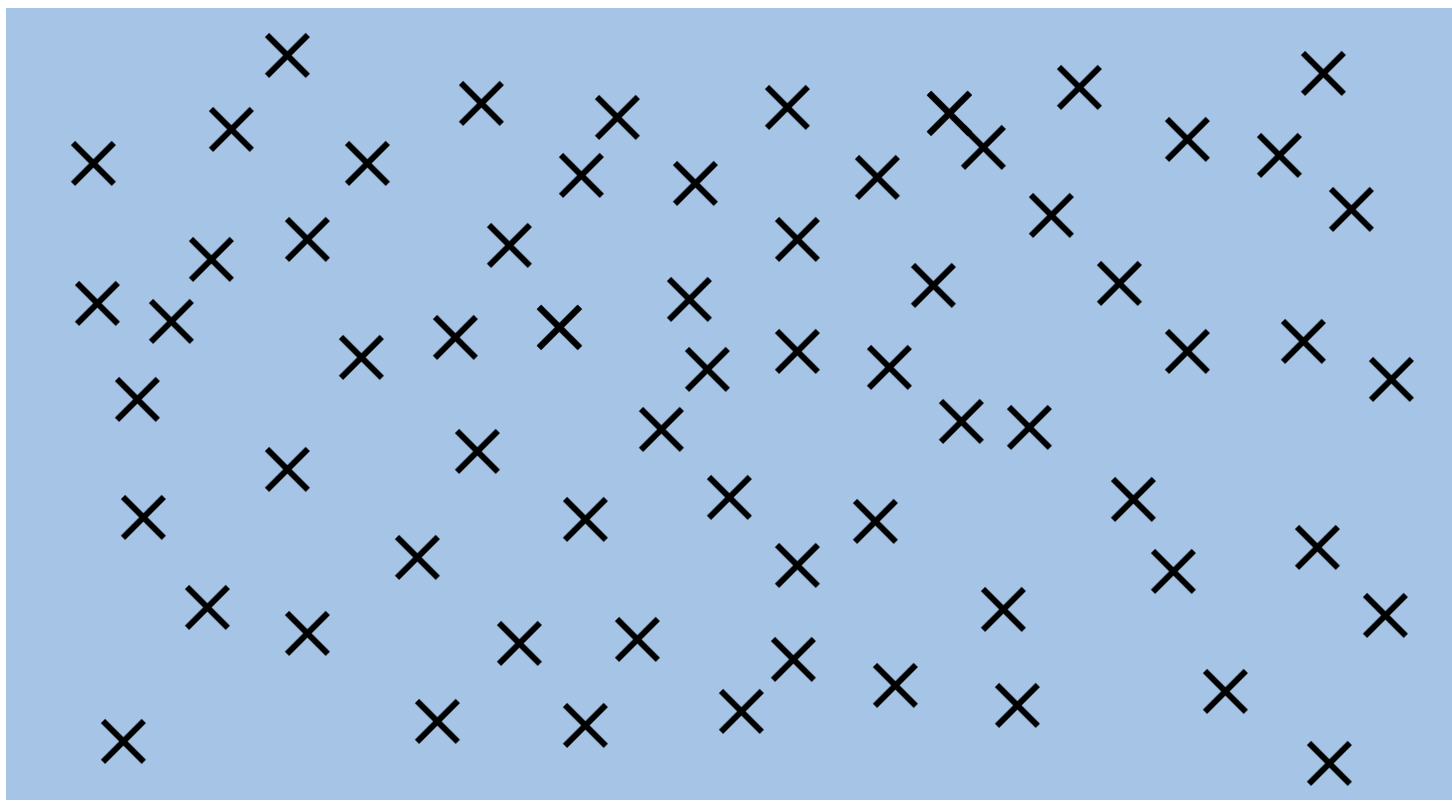

Voc√™ pode dividir o espa√ßo vetorial em regi√µes e procurar dentro de uma regi√£o pelos vizinhos mais pr√≥ximos de um vetor dado.

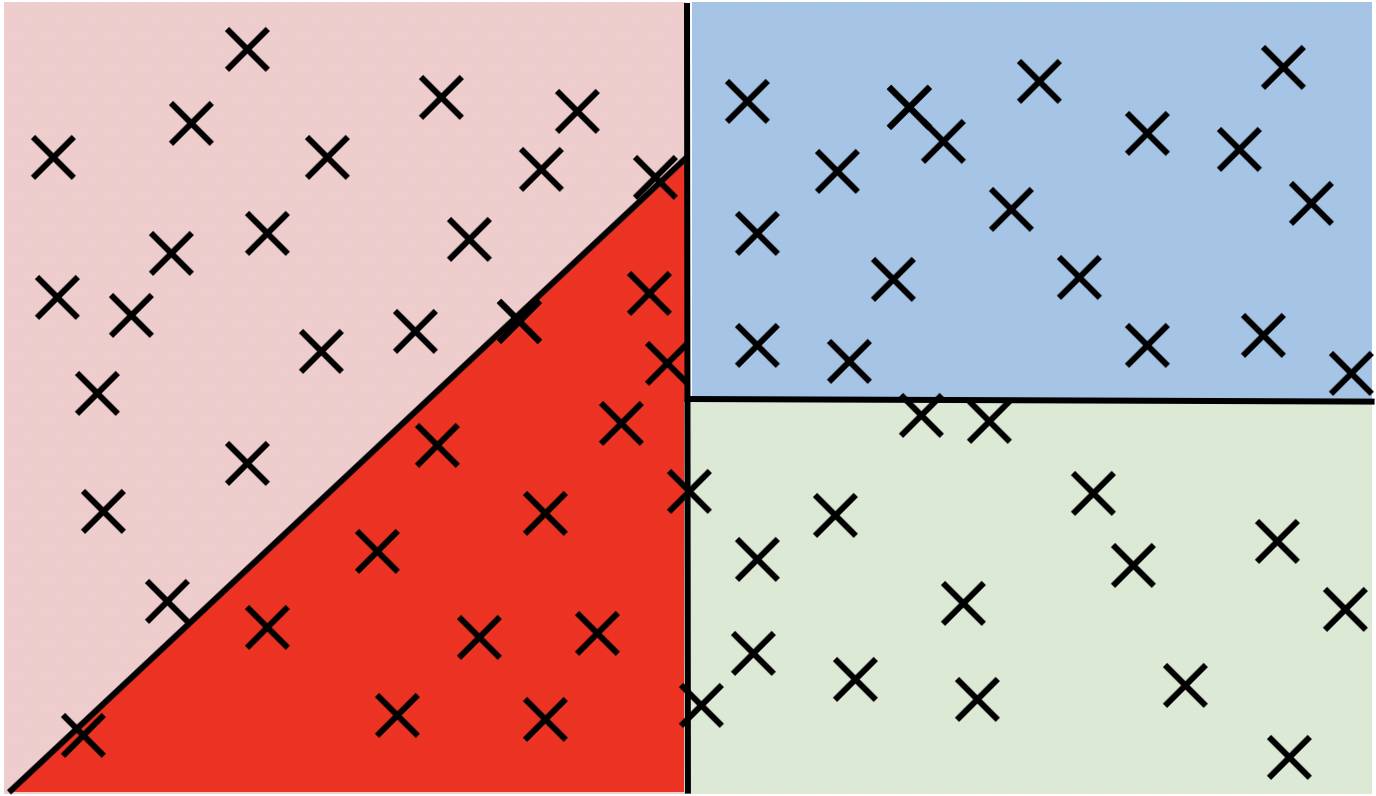

In [124]:
N_VECS = len(all_tweets)       # N√∫mero de vetores.
N_DIMS = len(ind2Tweet[1])     # Dimensionalidade do vetor.
print(f"O n√∫mero de vetores √© {N_VECS} e cada um tem {N_DIMS} dimens√µes.")

O n√∫mero de vetores √© 10000 e cada um tem 300 dimens√µes.


#### Escolhendo o n√∫mero de planos

* Cada plano divide o espa√ßo em 2 partes.
* Ent√£o, $ n $ planos dividem o espa√ßo em $ 2^n $ baldes de hash.
* Queremos organizar 10.000 vetores de documentos em baldes para que cada balde tenha cerca de ~16 vetores.
* Para isso, precisamos de $ \frac{10000}{16} = 625 $ baldes.
* Estamos interessados em $ n $, o n√∫mero de planos, para que $ 2^n = 625 $. Agora, podemos calcular $ n = \log_{2}(625) = 9.29 \approx 10 $.


In [125]:
# O n√∫mero de planos. Usamos log2(625) para ter ~16 vetores/balde.
N_PLANES = 10
# N√∫mero de vezes para repetir o hashing para melhorar a busca.
N_UNIVERSES = 25

### Obtendo o N√∫mero de Hash para um Vetor

Para cada vetor, precisamos obter um n√∫mero √∫nico associado a esse vetor para atribu√≠-lo a um "balde de hash".

#### Hipersuperf√≠cies em Espa√ßos Vetoriais
* Em um espa√ßo vetorial tridimensional, a hipersuperf√≠cie √© um plano regular. Em um espa√ßo vetorial bidimensional, a hipersuperf√≠cie √© uma linha.
* Geralmente, a hipersuperf√≠cie √© um subespa√ßo que tem uma dimens√£o a menos do que o espa√ßo vetorial original.
* Uma hipersuperf√≠cie √© definida exclusivamente pelo seu vetor normal.
* O vetor normal $ n $ do plano $ \pi $ √© o vetor ao qual todos os vetores no plano $ \pi $ s√£o ortogonais (perpendiculares no caso tridimensional).

#### Usando Hipersuperf√≠cies para Dividir o Espa√ßo Vetorial
Podemos usar uma hipersuperf√≠cie para dividir o espa√ßo vetorial em 2 partes.
* Todos os vetores cujo produto escalar com o vetor normal do plano √© positivo est√£o de um lado do plano.
* Todos os vetores cujo produto escalar com o vetor normal do plano √© negativo est√£o do outro lado do plano.

#### Codifica√ß√£o de Baldes de Hash
* Para um vetor, podemos calcular seu produto escalar com todos os planos e, em seguida, codificar essas informa√ß√µes para atribuir o vetor a um √∫nico balde de hash.
* Quando o vetor est√° apontando para o lado oposto da hipersuperf√≠cie em rela√ß√£o ao normal, codifique-o como 0.
* Caso contr√°rio, se o vetor estiver no mesmo lado que o vetor normal, codifique-o como 1.
* Se voc√™ calcular o produto escalar com cada plano na mesma ordem para todos os vetores, ter√° codificado o ID de hash exclusivo de cada vetor como um n√∫mero bin√°rio, como [0, 1, 1, ... 0].

### valor_hash_do_vetor

N√≥s inicializamos a tabela de hash `hashes`. √â uma lista de `N_UNIVERSES` matrizes, cada uma descreve sua pr√≥pria tabela de hash. Cada matriz tem `N_DIMS` linhas e `N_PLANES` colunas. Cada coluna dessa matriz √© um vetor normal de dimens√£o `N_DIMS` para cada um dos `N_PLANES` hipersuperf√≠cies que s√£o usadas para criar baldes da tabela de hash particular.

**Exerc√≠cio**: Completar a fun√ß√£o `hash_value_of_vector`, que coloca o vetor `v` no balde de hash correto.

* Primeiro, multiplique seu vetor `v` pelo plano correspondente. Isso lhe dar√° um vetor de dimens√£o (1, \text{N_planes}).
* Em seguida, converta cada elemento desse vetor para 0 ou 1.
* Crie um vetor de hash fazendo o seguinte: se o elemento for negativo, ele se torna 0; caso contr√°rio, ele se torna 1.
* Ent√£o voc√™ calcula o n√∫mero √∫nico para o vetor iterando sobre `N_PLANES`.
* Em seguida, multiplique $2^i$ vezes o bit correspondente (0 ou 1).
* Armazene essa soma na vari√°vel `hash_value`.

**Instru√ß√µes:** Crie um hash para o vetor na fun√ß√£o abaixo. Use a f√≥rmula:

$$ hash = \sum_{i=0}^{N-1} \left( 2^{i} \times h_{i} \right) $$

#### Criar os conjuntos de planos
* Crie v√°rios (25) conjuntos de planos (os planos que dividem a regi√£o).
* Voc√™ pode pensar nesses conjuntos como 25 maneiras separadas de dividir o espa√ßo vetorial com um conjunto diferente de planos.
* Cada elemento desta lista cont√©m uma matriz com 300 linhas (os vetores de palavras t√™m 300 dimens√µes) e 10 colunas (h√° 10 planos em cada "universo").

In [131]:
np.random.seed(0)
planes_l = [np.random.normal(size=(N_DIMS, N_PLANES))
            for _ in range(N_UNIVERSES)]

In [132]:
def hash_value_of_vector(v, planes):
    """Cria um hash para um vetor; hash_id indica qual hash aleat√≥rio usar.
    Entrada:
        - v: vetor do tweet. Sua dimens√£o √© (1, N_DIMS)
        - planes: matriz de dimens√£o (N_DIMS, N_PLANES) - o conjunto de planos que divide a regi√£o
    Sa√≠da:
        - res: um n√∫mero usado como hash para o seu vetor
    """

    # calcula o produto escalar entre o vetor e a matriz contendo os planos
    dot_product = np.dot(v, planes)
        
    # obt√©m o sinal do produto escalar (vetor de formato (1,10))
    sign_of_dot_product = np.sign(dot_product)

    # define h como falso (equivalente a 0 quando usado em opera√ß√µes) se o sinal for negativo,
    # e verdadeiro (equivalente a 1) se o sinal for positivo (vetor de formato (1,10))
    h = sign_of_dot_product >= 0

    # remove dimens√µes extras n√£o usadas (converte de um array 2D para um array 1D)
    h = h.flatten()

    # inicializa o valor do hash como 0
    hash_value = 0

    n_planes = planes.shape[1]
    for i in range(n_planes):
        # incrementa o valor do hash por 2^i * h_i        
        hash_value += h[i] * (2 ** i)

    # converte hash_value para um inteiro
    hash_value = int(hash_value)

    return hash_value

In [133]:
np.random.seed(0)
idx = 0
planes = planes_l[idx]  # obtenha um 'universo' de planos para testar a fun√ß√£o
vec = np.random.rand(1, 300)
print(f"O valor do hash para este vetor,",
      f"e o conjunto de planos no √≠ndice {idx},",
      f"√© {hash_value_of_vector(vec, planes)}")

O valor do hash para este vetor, e o conjunto de planos no √≠ndice 0, √© 768


### Criando uma Tabela de Hash

### criar_tabela_de_hash

Dado que voc√™ tem um n√∫mero √∫nico para cada vetor (ou tweet), agora voc√™ deseja criar uma tabela de hash. Voc√™ precisa de uma tabela de hash para que, dado um `hash_id`, voc√™ possa rapidamente procurar os vetores correspondentes. Isso permite reduzir seu tempo de busca de forma significativa.

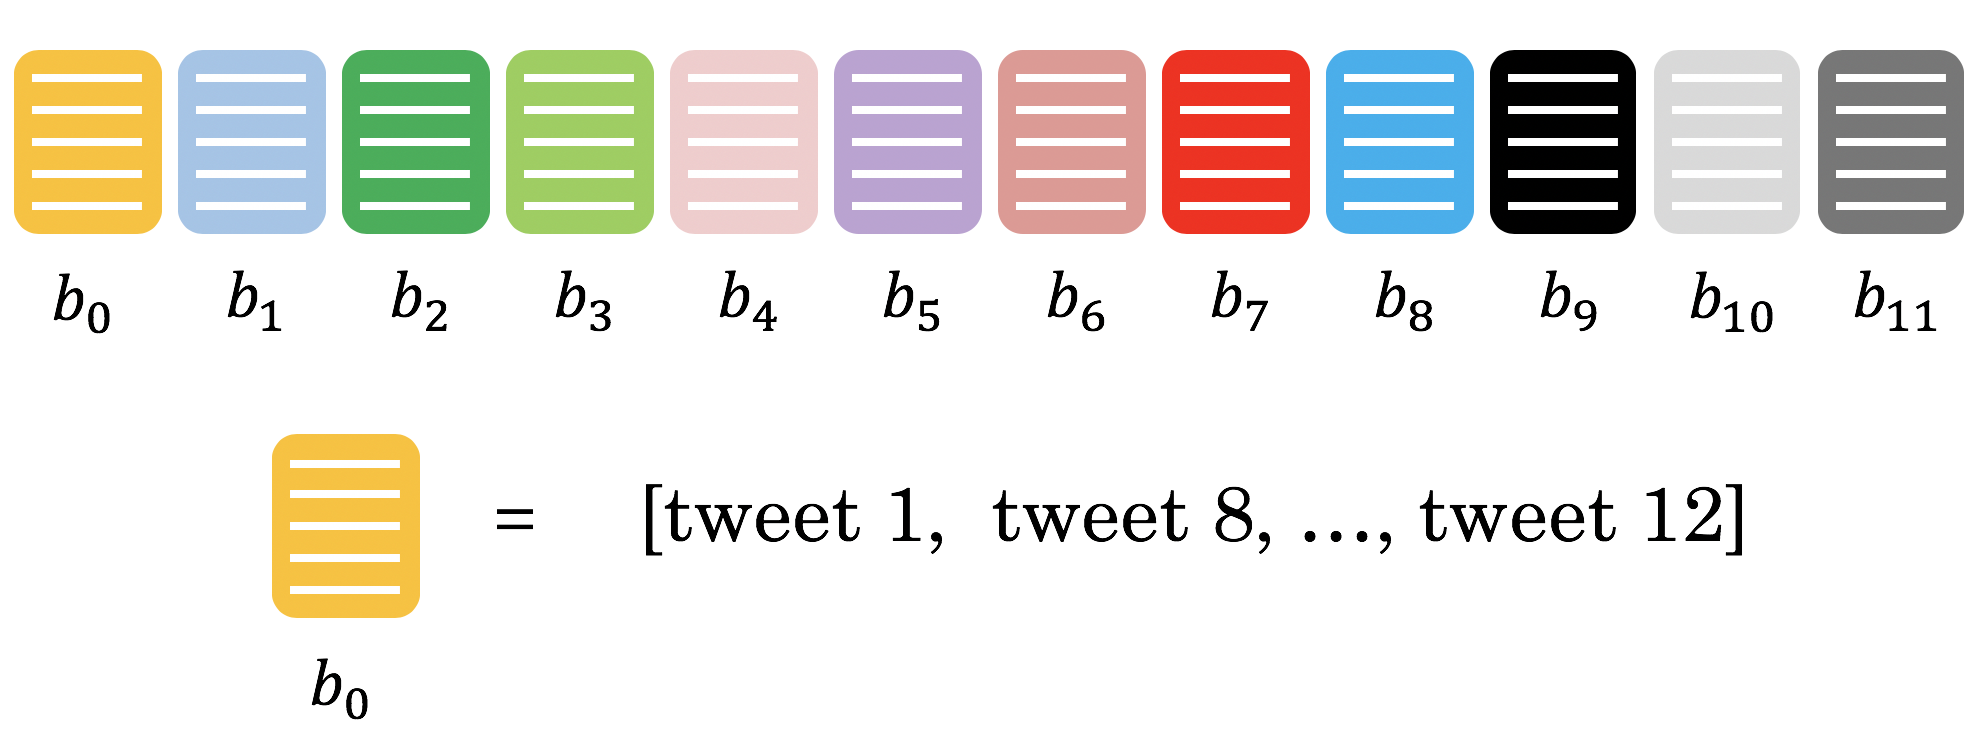

N√≥s fornecemos a fun√ß√£o `make_hash_table`, que mapeia os vetores de tweet para um balde e armazena o vetor l√°. Ela retorna a `hash_table` e a `id_table`. A `id_table` permite saber qual vetor em um determinado balde corresponde a qual tweet.

In [134]:
def make_hash_table(vecs, planes, hash_value_of_vector=hash_value_of_vector):
    """
    Entrada:
        - vecs: lista de vetores a serem hasheados.
        - planes: a matriz de planos em um √∫nico "universo", com formato (dimens√µes de embedding, n√∫mero de planos).
    Sa√≠da:
        - hash_table: dicion√°rio - chaves s√£o hashes, valores s√£o listas de vetores (baldes de hash)
        - id_table: dicion√°rio - chaves s√£o hashes, valores s√£o listas de IDs de vetores
                    (√© usado para saber qual tweet corresponde ao vetor hasheado)
    """
    # n√∫mero de planos √© o n√∫mero de colunas na matriz de planos
    num_of_planes = planes.shape[1]

    # n√∫mero de baldes √© 2^(n√∫mero de planos)
    num_buckets = 2**num_of_planes

    # cria a tabela de hash como um dicion√°rio.
    # As chaves s√£o inteiros (0,1,2... n√∫mero de baldes)
    # Os valores s√£o listas vazias
    hash_table = {i: [] for i in range(num_buckets)}

    # cria a tabela de IDs como um dicion√°rio.
    # As chaves s√£o inteiros (0,1,2... n√∫mero de baldes)
    # Os valores s√£o listas vazias
    id_table = {i: [] for i in range(num_buckets)}

    # para cada vetor em 'vecs'
    for i, v in enumerate(vecs):
        # calcula o valor do hash para o vetor
        h = hash_value_of_vector(v, planes)

        # armazena o vetor na hash_table na chave h,
        # adicionando o vetor v √† lista na chave h
        hash_table[h].append(v)

        # armazena o √≠ndice do vetor 'i' (cada documento recebe um inteiro √∫nico 0,1,2...)
        # a chave √© h, e o 'i' √© adicionado √† lista na chave h
        id_table[h].append(i)

    return hash_table, id_table

In [137]:
planes = planes_l[1]  # obter um 'universo' de planos para testar a fun√ß√£o
tmp_hash_table, tmp_id_table = make_hash_table(document_vecs, planes)

print(f"A tabela de hash na chave 1 tem {len(tmp_hash_table[0])} vetores de documentos")
print(f"A tabela de IDs na chave 1 tem {len(tmp_id_table[0])} √≠ndices de documentos")
print(f"Os primeiros 5 √≠ndices de documentos armazenados na chave 0 da tabela de IDs s√£o {tmp_id_table[0][0:5]}")

A tabela de hash na chave 1 tem 10 vetores de documentos
A tabela de IDs na chave 1 tem 10 √≠ndices de documentos
Os primeiros 5 √≠ndices de documentos armazenados na chave 0 da tabela de IDs s√£o [1928, 2150, 2351, 3607, 4219]


### Criando Todas as Tabelas de Hash

Agora voc√™ pode hash seus vetores e armazen√°-los em uma tabela de hash que permite procurar rapidamente e buscar vetores semelhantes. Execute a c√©lula abaixo para criar os hashes. Ao fazer isso, voc√™ ter√° v√°rias tabelas que cont√™m todos os vetores. Dado um vetor, voc√™ identificar√° os baldes em todas as tabelas. Voc√™ pode ent√£o iterar sobre os baldes e considerar muitos menos vetores. Quanto mais tabelas voc√™ usar, mais precisa ser√° sua busca, mas tamb√©m mais tempo levar√°.


# Criando as tabelas de hash

In [138]:
def create_hash_id_tables(n_universes):
    hash_tables = []
    id_tables = []
    for universe_id in range(n_universes):  # h√° 25 hashes
        print('trabalhando no universo de hash #:', universe_id)
        planes = planes_l[universe_id]
        hash_table, id_table = make_hash_table(document_vecs, planes)
        hash_tables.append(hash_table)
        id_tables.append(id_table)
    
    return hash_tables, id_tables

hash_tables, id_tables = create_hash_id_tables(N_UNIVERSES)

trabalhando no universo de hash #: 0
trabalhando no universo de hash #: 1
trabalhando no universo de hash #: 2
trabalhando no universo de hash #: 3
trabalhando no universo de hash #: 4
trabalhando no universo de hash #: 5
trabalhando no universo de hash #: 6
trabalhando no universo de hash #: 7
trabalhando no universo de hash #: 8
trabalhando no universo de hash #: 9
trabalhando no universo de hash #: 10
trabalhando no universo de hash #: 11
trabalhando no universo de hash #: 12
trabalhando no universo de hash #: 13
trabalhando no universo de hash #: 14
trabalhando no universo de hash #: 15
trabalhando no universo de hash #: 16
trabalhando no universo de hash #: 17
trabalhando no universo de hash #: 18
trabalhando no universo de hash #: 19
trabalhando no universo de hash #: 20
trabalhando no universo de hash #: 21
trabalhando no universo de hash #: 22
trabalhando no universo de hash #: 23
trabalhando no universo de hash #: 24


### k-NN Aproximado

Implemente o k-vizinhos mais pr√≥ximos aproximado usando hashing sens√≠vel √† localidade para buscar documentos semelhantes a um documento dado no √≠ndice `doc_id`.

##### Entradas
* `doc_id` √© o √≠ndice na lista de documentos `all_tweets`.
* `v` √© o vetor do documento para o tweet em `all_tweets` no √≠ndice `doc_id`.
* `planes_l` √© a lista de planos (a vari√°vel global criada anteriormente).
* `k` √© o n√∫mero de vizinhos mais pr√≥ximos a serem pesquisados.
* `num_universes_to_use`: para economizar tempo, podemos usar menos do que o n√∫mero total de universos dispon√≠veis. Por padr√£o, est√° definido como `N_UNIVERSES`, que √© 25 para esta tarefa.
* `hash_tables`: lista com tabelas de hash para cada universo.
* `id_tables`: lista com tabelas de ids para cada universo.

A fun√ß√£o `approximate_knn` encontra um subconjunto de vetores candidatos que est√£o no mesmo "balde de hash" que o vetor de entrada 'v'. Em seguida, realiza a busca usual de k-vizinhos mais pr√≥ximos nesse subconjunto (em vez de pesquisar entre todos os 10.000 tweets).

In [139]:
def approximate_knn(doc_id, v, planes_l, hash_tables, id_tables, k=1, num_universes_to_use=25, hash_value_of_vector=hash_value_of_vector):
    """Buscar k-NN usando hashes."""
    #assert num_universes_to_use <= N_UNIVERSES

    # Vetores que ser√£o verificados como poss√≠veis vizinhos mais pr√≥ximos
    vecs_to_consider_l = list()

    # Lista de IDs de documentos
    ids_to_consider_l = list()

    # Criar um conjunto para IDs a considerar, para uma verifica√ß√£o mais r√°pida se um ID de documento j√° existe no conjunto
    ids_to_consider_set = set()

    # Loop atrav√©s dos universos de planos
    for universe_id in range(num_universes_to_use):

        # Obter o conjunto de planos da lista planes_l, para este particular universe_id
        planes = planes_l[universe_id]

        # Obter o valor de hash do vetor para este conjunto de planos
        hash_value = hash_value_of_vector(v, planes)

        # Obter a tabela de hash para este particular universe_id
        hash_table = hash_tables[universe_id]

        # Obter a lista de vetores de documentos para esta tabela de hash, onde a chave √© o hash_value
        document_vectors_l = hash_table[hash_value]

        # Obter a id_table para este particular universe_id
        id_table = id_tables[universe_id]

        # Obter o subconjunto de documentos a considerar como vizinhos mais pr√≥ximos a partir deste dicion√°rio id_table
        new_ids_to_consider = id_table[hash_value]

        # Loop atrav√©s do subconjunto de vetores de documentos a considerar
        for i, new_id in enumerate(new_ids_to_consider):
            
            if doc_id == new_id:
                continue

            # Se o ID do documento ainda n√£o estiver no conjunto ids_to_consider...
            if new_id not in ids_to_consider_set:
                # Acessar a lista document_vectors_l no √≠ndice i para obter a incorpora√ß√£o
                # ent√£o adicionar √† lista de vetores a considerar como poss√≠veis vizinhos mais pr√≥ximos
                document_vector_at_i = document_vectors_l[i]
                vecs_to_consider_l.append(document_vector_at_i)

                # Adicionar o new_id (o √≠ndice para o documento) √† lista de IDs a considerar
                ids_to_consider_l.append(new_id)

                # Tamb√©m adicionar o new_id ao conjunto de IDs a considerar
                # (usar isso para verificar se new_id n√£o est√° j√° nos IDs a considerar)
                ids_to_consider_set.add(new_id)


    # Agora execute k-NN no conjunto menor de vetores a considerar.
    print("Considerando rapidamente %d vetores" % len(vecs_to_consider_l))

    # Converter o conjunto de vetores a considerar para uma lista, e depois para um array numpy
    vecs_to_consider_arr = np.array(vecs_to_consider_l)

    # Chamar nearest neighbors na lista reduzida de vetores candidatos
    nearest_neighbor_idx_l = nearest_neighbor(v, vecs_to_consider_arr, k=k)

    # Usar a lista de √≠ndices dos vizinhos mais pr√≥ximos como √≠ndices para os IDs a considerar
    # Criar uma lista de vizinhos mais pr√≥ximos pelos IDs dos documentos
    nearest_neighbor_ids = [ids_to_consider_l[idx] for idx in nearest_neighbor_idx_l]

    return nearest_neighbor_ids

In [140]:
#document_vecs, ind2Tweet
doc_id = 0
doc_to_search = all_tweets[doc_id]
vec_to_search = document_vecs[doc_id]

In [141]:
# Sample
nearest_neighbor_ids = approximate_knn(
    doc_id, vec_to_search, planes_l, hash_tables, id_tables, k=3, num_universes_to_use=5)

Considerando rapidamente 79 vetores


In [142]:
print(f"Nearest neighbors for document {doc_id}")
print(f"Document contents: {all_tweets[doc_id]}")
print("")

for neighbor_id in nearest_neighbor_ids:
    print(f"Nearest neighbor at document id {neighbor_id}")
    print(f"Document contents: {all_tweets[neighbor_id]}")

Nearest neighbors for document 0
Document contents: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Nearest neighbor at document id 51
Document contents: #FollowFriday @France_Espana @reglisse_menthe @CCI_inter for being top engaged members in my community this week :)
Nearest neighbor at document id 1876
Document contents: #ShareTheLove @hotwifecleo @_PetPuK_ @omaro22omaro for being top HighValue members this week :)
Nearest neighbor at document id 105
Document contents: #FollowFriday @straz_das @DCarsonCPA @GH813600 for being top engaged members in my community this week :)
